In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import xgboost as xgb
from prophet import Prophet
# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt



In [ ]:
colnames = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
train_dfs = pd.read_csv("ADMHE_System_Load_2013-01-01_2015-12-31_training_15in_1out_2013-2015trn_2016tst.csv",names=colnames, header=None)

In [ ]:
train_dfs

A     B     C     D     E     F     G     H     I     J     K     L  \
0      6615  6141  5525  5040  5011  6356  6033  5444  4846  4834  5718  5509   
1      6141  5525  5040  5011  4817  6033  5444  4846  4834  4658  5509  5029   
2      5525  5040  5011  4817  4685  5444  4846  4834  4658  4510  5029  4593   
3      5040  5011  4817  4685  4784  4846  4834  4658  4510  4554  4593  4598   
4      5011  4817  4685  4784  5321  4834  4658  4510  4554  4988  4598  4374   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
26083  7571  7888  7889  7711  7291  6611  7184  7242  7145  6710  6996  7592   
26084  7888  7889  7711  7291  6690  7184  7242  7145  6710  6149  7592  7669   
26085  7889  7711  7291  6690  6179  7242  7145  6710  6149  5701  7669  7492   
26086  7711  7291  6690  6179  5501  7145  6710  6149  5701  5089  7492  6950   
26087  7291  6690  6179  5501  4959  6710  6149  5701  5089  4605  6950  6239   

          M     N     O     P  
0      5029  4593  4598  5925  
1      4593  4598  4374  5427  
2      4598  4374  4246  5387  
3      4374  4246  4278  5207  
4      4246  4278  4591  5146  
...     ...   ...   ...   ...  
26083  7669  7492  6950  8937  
26084  7492  6950  6239  8527  
26085  6950  6239  5782  7695  
26086  6239  5782  5263  6712  
26087  5782  5263  4833  6211  

[26088 rows x 16 columns]

In [ ]:
colnames = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
test_dfs = pd.read_csv("ADMHE_System_Load_2016-01-01_2016-12-31_testing_15in_1out_2013-2015trn_2016tst.csv",names=colnames, header=None)

In [ ]:
test_dfs

A     B     C     D     E     F     G     H     I     J     K     L  \
0     6077  5629  5084  4611  4582  5540  5216  4764  4352  4317  6333  6057   
1     5629  5084  4611  4582  4405  5216  4764  4352  4317  4119  6057  5585   
2     5084  4611  4582  4405  4300  4764  4352  4317  4119  4026  5585  5120   
3     4611  4582  4405  4300  4366  4352  4317  4119  4026  4127  5120  5043   
4     4582  4405  4300  4366  4788  4317  4119  4026  4127  4498  5043  4799   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8587  7819  8299  8302  7941  7269  7715  8061  8040  7837  7332  7159  7837   
8588  8299  8302  7941  7269  6776  8061  8040  7837  7332  6763  7837  7901   
8589  8302  7941  7269  6776  6395  8040  7837  7332  6763  6261  7901  7584   
8590  7941  7269  6776  6395  5779  7837  7332  6763  6261  5646  7584  6957   
8591  7269  6776  6395  5779  5232  7332  6763  6261  5646  5072  6957  6348   

         M     N     O     P  
0     5585  5120  5043  5172  
1     5120  5043  4799  4756  
2     5043  4799  4626  4680  
3     4799  4626  4640  4482  
4     4626  4640  4790  4334  
...    ...   ...   ...   ...  
8587  7901  7584  6957  8971  
8588  7584  6957  6348  8563  
8589  6957  6348  5947  7705  
8590  6348  5947  5414  6759  
8591  5947  5414  4980  6320  

[8592 rows x 16 columns]

In [ ]:
train_dfs['Datetime'] = pd.date_range(start='2013-1-1',end='2015-12-24',freq='H')[:-1]
train_dfs['Datetime']

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
26083   2015-12-23 19:00:00
26084   2015-12-23 20:00:00
26085   2015-12-23 21:00:00
26086   2015-12-23 22:00:00
26087   2015-12-23 23:00:00
Name: Datetime, Length: 26088, dtype: datetime64[ns]

In [ ]:
train_dfs

A     B     C     D     E     F     G     H     I     J     K     L  \
0      6615  6141  5525  5040  5011  6356  6033  5444  4846  4834  5718  5509   
1      6141  5525  5040  5011  4817  6033  5444  4846  4834  4658  5509  5029   
2      5525  5040  5011  4817  4685  5444  4846  4834  4658  4510  5029  4593   
3      5040  5011  4817  4685  4784  4846  4834  4658  4510  4554  4593  4598   
4      5011  4817  4685  4784  5321  4834  4658  4510  4554  4988  4598  4374   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
26083  7571  7888  7889  7711  7291  6611  7184  7242  7145  6710  6996  7592   
26084  7888  7889  7711  7291  6690  7184  7242  7145  6710  6149  7592  7669   
26085  7889  7711  7291  6690  6179  7242  7145  6710  6149  5701  7669  7492   
26086  7711  7291  6690  6179  5501  7145  6710  6149  5701  5089  7492  6950   
26087  7291  6690  6179  5501  4959  6710  6149  5701  5089  4605  6950  6239   

          M     N     O     P            Datetime  
0      5029  4593  4598  5925 2013-01-01 00:00:00  
1      4593  4598  4374  5427 2013-01-01 01:00:00  
2      4598  4374  4246  5387 2013-01-01 02:00:00  
3      4374  4246  4278  5207 2013-01-01 03:00:00  
4      4246  4278  4591  5146 2013-01-01 04:00:00  
...     ...   ...   ...   ...                 ...  
26083  7669  7492  6950  8937 2015-12-23 19:00:00  
26084  7492  6950  6239  8527 2015-12-23 20:00:00  
26085  6950  6239  5782  7695 2015-12-23 21:00:00  
26086  6239  5782  5263  6712 2015-12-23 22:00:00  
26087  5782  5263  4833  6211 2015-12-23 23:00:00  

[26088 rows x 17 columns]

In [ ]:
train_dfs.set_index('Datetime',inplace=True)
train_dfs

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2015-12-23 19:00:00  7571  7888  7889  7711  7291  6611  7184  7242  7145   
2015-12-23 20:00:00  7888  7889  7711  7291  6690  7184  7242  7145  6710   
2015-12-23 21:00:00  7889  7711  7291  6690  6179  7242  7145  6710  6149   
2015-12-23 22:00:00  7711  7291  6690  6179  5501  7145  6710  6149  5701   
2015-12-23 23:00:00  7291  6690  6179  5501  4959  6710  6149  5701  5089   

                        J     K     L     M     N     O     P  
Datetime                                                       
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  
...                   ...   ...   ...   ...   ...   ...   ...  
2015-12-23 19:00:00  6710  6996  7592  7669  7492  6950  8937  
2015-12-23 20:00:00  6149  7592  7669  7492  6950  6239  8527  
2015-12-23 21:00:00  5701  7669  7492  6950  6239  5782  7695  
2015-12-23 22:00:00  5089  7492  6950  6239  5782  5263  6712  
2015-12-23 23:00:00  4605  6950  6239  5782  5263  4833  6211  

[26088 rows x 16 columns]

In [ ]:
test_dfs['Datetime'] = pd.date_range(start='2015-12-24',end='2016-12-16',freq='H')[:-1]
test_dfs

A     B     C     D     E     F     G     H     I     J     K     L  \
0     6077  5629  5084  4611  4582  5540  5216  4764  4352  4317  6333  6057   
1     5629  5084  4611  4582  4405  5216  4764  4352  4317  4119  6057  5585   
2     5084  4611  4582  4405  4300  4764  4352  4317  4119  4026  5585  5120   
3     4611  4582  4405  4300  4366  4352  4317  4119  4026  4127  5120  5043   
4     4582  4405  4300  4366  4788  4317  4119  4026  4127  4498  5043  4799   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8587  7819  8299  8302  7941  7269  7715  8061  8040  7837  7332  7159  7837   
8588  8299  8302  7941  7269  6776  8061  8040  7837  7332  6763  7837  7901   
8589  8302  7941  7269  6776  6395  8040  7837  7332  6763  6261  7901  7584   
8590  7941  7269  6776  6395  5779  7837  7332  6763  6261  5646  7584  6957   
8591  7269  6776  6395  5779  5232  7332  6763  6261  5646  5072  6957  6348   

         M     N     O     P            Datetime  
0     5585  5120  5043  5172 2015-12-24 00:00:00  
1     5120  5043  4799  4756 2015-12-24 01:00:00  
2     5043  4799  4626  4680 2015-12-24 02:00:00  
3     4799  4626  4640  4482 2015-12-24 03:00:00  
4     4626  4640  4790  4334 2015-12-24 04:00:00  
...    ...   ...   ...   ...                 ...  
8587  7901  7584  6957  8971 2016-12-15 19:00:00  
8588  7584  6957  6348  8563 2016-12-15 20:00:00  
8589  6957  6348  5947  7705 2016-12-15 21:00:00  
8590  6348  5947  5414  6759 2016-12-15 22:00:00  
8591  5947  5414  4980  6320 2016-12-15 23:00:00  

[8592 rows x 17 columns]

In [ ]:
test_dfs.loc[test_dfs.Datetime=='2016-01-01 00:00:00']

A     B     C     D     E     F     G     H     I     J     K     L  \
192  5881  5540  5009  4549  4521  6135  5692  5119  4673  4635  5751  5402   

        M     N     O     P   Datetime  
192  4920  4505  4425  4998 2016-01-01

In [ ]:
test_dfs.loc[test_dfs.Datetime=='2016-02-01']

A     B     C     D     E     F     G     H     I     J     K     L  \
936  5321  4909  4445  4087  4017  5253  4861  4398  3985  3954  6365  5884   

        M     N     O     P   Datetime  
936  5243  4743  4705  4466 2016-02-01

In [ ]:
test_dfs.loc[test_dfs.Datetime=='2016-01-08']

A     B     C     D     E     F     G     H     I     J     K     L  \
360  6591  6165  5611  5114  5056  6719  6203  5620  5119  5060  5849  5470   

        M     N     O     P   Datetime  
360  4998  4578  4481  5647 2016-01-08

In [ ]:
test_dfs.loc[test_dfs.Datetime=='2016-08-15']

A     B     C     D     E     F     G     H     I     J     K     L  \
5640  6429  6085  5655  5270  5069  5845  5561  5189  4870  4659  6065  5781   

         M     N     O     P   Datetime  
5640  5426  5095  4834  5764 2016-08-15

In [ ]:
test_dfs.loc[test_dfs.Datetime=='2016-08-16']

A     B     C     D     E     F     G     H     I     J     K     L  \
5664  6551  6217  5764  5302  5093  6429  6085  5655  5270  5069  6023  5775   

         M     N     O     P   Datetime  
5664  5362  4981  4720  5791 2016-08-16

In [ ]:
test_dfs.set_index('Datetime',inplace=True)

In [ ]:
test_dfs

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2015-12-24 00:00:00  6077  5629  5084  4611  4582  5540  5216  4764  4352   
2015-12-24 01:00:00  5629  5084  4611  4582  4405  5216  4764  4352  4317   
2015-12-24 02:00:00  5084  4611  4582  4405  4300  4764  4352  4317  4119   
2015-12-24 03:00:00  4611  4582  4405  4300  4366  4352  4317  4119  4026   
2015-12-24 04:00:00  4582  4405  4300  4366  4788  4317  4119  4026  4127   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  
Datetime                                                       
2015-12-24 00:00:00  4317  6333  6057  5585  5120  5043  5172  
2015-12-24 01:00:00  4119  6057  5585  5120  5043  4799  4756  
2015-12-24 02:00:00  4026  5585  5120  5043  4799  4626  4680  
2015-12-24 03:00:00  4127  5120  5043  4799  4626  4640  4482  
2015-12-24 04:00:00  4498  5043  4799  4626  4640  4790  4334  
...                   ...   ...   ...   ...   ...   ...   ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  

[8592 rows x 16 columns]

In [ ]:
whole_dfs = pd.concat([train_dfs,test_dfs],axis=0)
whole_dfs

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  
Datetime                                                       
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  
...                   ...   ...   ...   ...   ...   ...   ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  

[34680 rows x 16 columns]

In [ ]:
final_df = whole_dfs.copy()

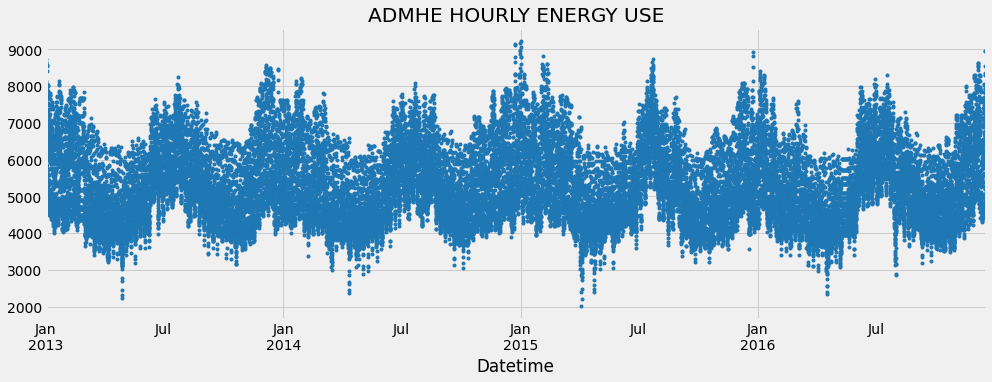

In [ ]:
final_df['P'].plot(style='.',figsize=(15,5),color=color_pal[0],title='ADMHE HOURLY ENERGY USE')
plt.show()

In [ ]:
final_df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64

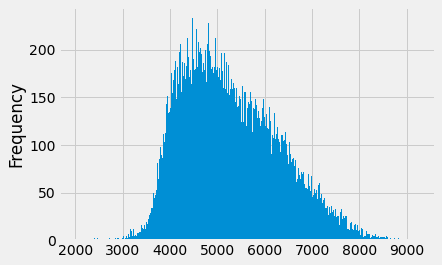

In [ ]:
final_df['P'].plot(kind='hist',bins=500)

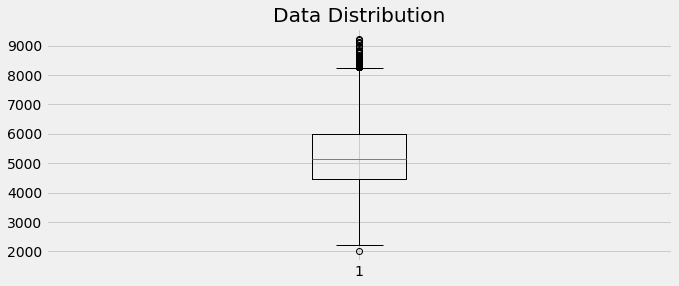

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.boxplot(final_df.P)
plt.title('Data Distribution')
fig.show()

In [ ]:
outliers = [i for i in final_df.P if i>8500 or i<2500]
print("outliers are: ", outliers)

outliers are:  [8664, 8732, 8620, 8557, 8568, 2464, 2240, 2319, 8572, 8516, 8523, 8505, 2379, 2451, 8656, 9136, 9108, 8798, 8949, 8981, 8866, 9189, 9237, 9075, 8794, 8783, 8616, 8594, 8533, 8540, 8832, 8513, 8592, 8591, 2407, 2021, 2203, 2473, 2475, 2409, 8508, 8654, 8535, 8583, 8737, 8821, 8937, 8527, 2395, 2331, 8619, 8625, 8572, 8522, 8552, 8948, 8971, 8563]


In [ ]:
#final_dfs = final_df.query('P<=8500 and P>=2500').copy()

In [ ]:
final_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  
Datetime                                                       
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  
...                   ...   ...   ...   ...   ...   ...   ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  

[34680 rows x 16 columns]

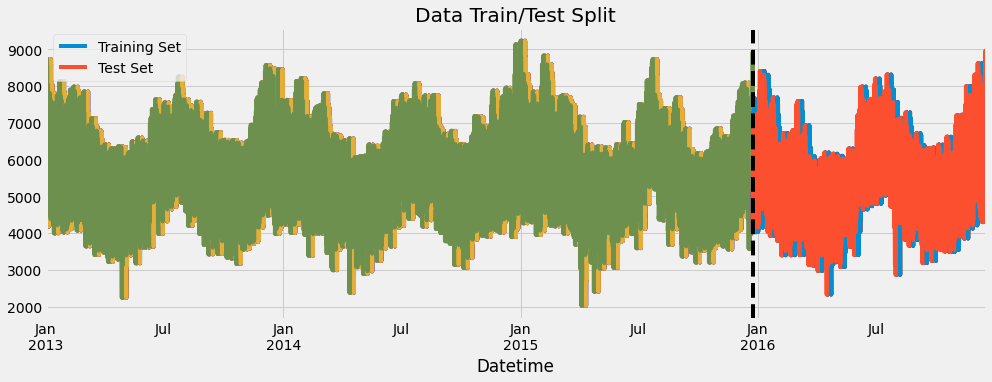

In [ ]:
train = final_df.loc[final_df.index < '24-12-2015']
test = final_df.loc[final_df.index >= '24-12-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('24-12-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

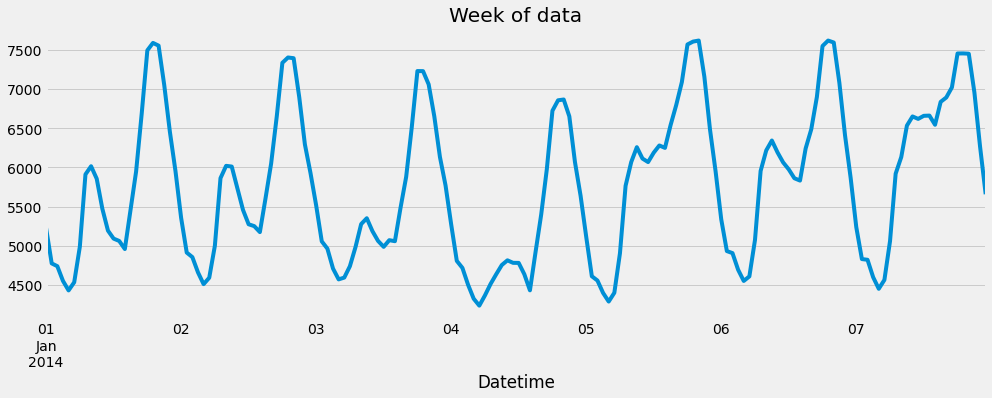

In [ ]:
final_df['P'].loc[(final_df.index >= '01-01-2014')&(final_df.index < '01-08-2014')].plot(figsize=(15,5),title='Week of data')
plt.show()

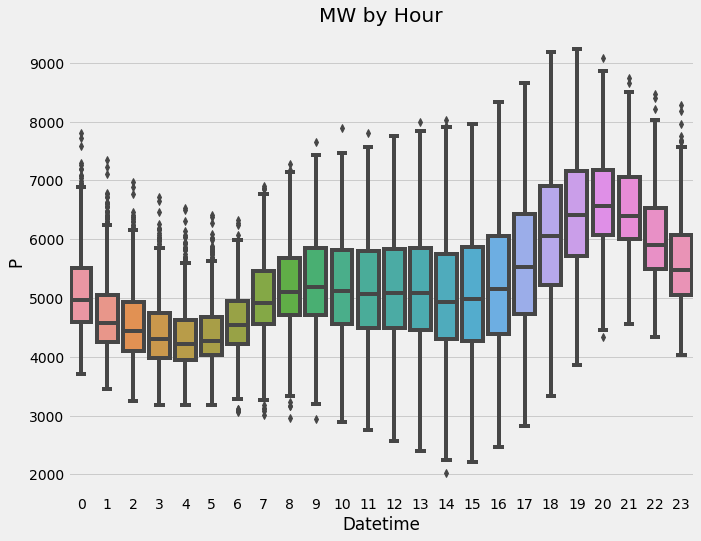

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=final_df, x=final_df.index.hour, y=final_df['P'])
ax.set_title('MW by Hour')
plt.show()

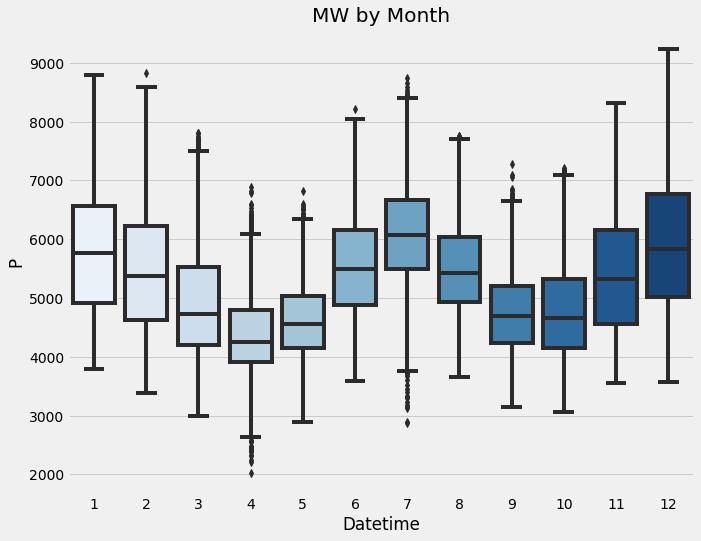

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=final_df, x=final_df.index.month, y=final_df['P'], palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [ ]:
electricity_df = final_df.copy()


In [ ]:
electricity_df['target'] = electricity_df.shift(-1)['P']
electricity_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  target  
Datetime                                                               
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0  
...                   ...   ...   ...   ...   ...   ...   ...     ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320     NaN  

[34680 rows x 17 columns]

In [ ]:
electricity_df = electricity_df.ffill()
electricity_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  target  
Datetime                                                               
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0  
...                   ...   ...   ...   ...   ...   ...   ...     ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  6320.0  

[34680 rows x 17 columns]

In [ ]:
electricity_df.corr()

A         B         C         D         E         F         G  \
A       1.000000  0.951865  0.834696  0.682331  0.526000  0.900904  0.858988   
B       0.951865  1.000000  0.951868  0.834697  0.682327  0.854476  0.900910   
C       0.834696  0.951868  1.000000  0.951866  0.834691  0.743319  0.854480   
D       0.682331  0.834697  0.951866  1.000000  0.951864  0.598168  0.743319   
E       0.526000  0.682327  0.834691  0.951864  1.000000  0.448535  0.598159   
F       0.900904  0.854476  0.743319  0.598168  0.448535  1.000000  0.951814   
G       0.858988  0.900910  0.854480  0.743319  0.598159  0.951814  1.000000   
H       0.752336  0.858990  0.900912  0.854482  0.743316  0.834520  0.951812   
I       0.611593  0.752332  0.858986  0.900911  0.854481  0.682005  0.834511   
J       0.465931  0.611584  0.752322  0.858981  0.900909  0.525546  0.681989   
K       0.799193  0.757837  0.653596  0.516289  0.374469  0.772583  0.732012   
L       0.755468  0.799206  0.757853  0.653610  0.516299  0.729564  0.772602   
M       0.649144  0.755471  0.799213  0.757865  0.653624  0.624998  0.729573   
N       0.509756  0.649137  0.755466  0.799217  0.757874  0.487936  0.624995   
O       0.366097  0.509744  0.649126  0.755463  0.799221  0.346517  0.487925   
P       0.743643  0.854674  0.901038  0.859176  0.752677  0.676683  0.783237   
target  0.598619  0.743636  0.854668  0.901036  0.859175  0.537137  0.676682   

               H         I         J         K         L         M         N  \
A       0.752336  0.611593  0.465931  0.799193  0.755468  0.649144  0.509756   
B       0.858990  0.752332  0.611584  0.757837  0.799206  0.755471  0.649137   
C       0.900912  0.858986  0.752322  0.653596  0.757853  0.799213  0.755466   
D       0.854482  0.900911  0.858981  0.516289  0.653610  0.757865  0.799217   
E       0.743316  0.854481  0.900909  0.374469  0.516299  0.653624  0.757874   
F       0.834520  0.682005  0.525546  0.772583  0.729564  0.624998  0.487936   
G       0.951812  0.834511  0.681989  0.732012  0.772602  0.729573  0.624995   
H       1.000000  0.951809  0.834505  0.629201  0.732031  0.772616  0.729578   
I       0.951809  1.000000  0.951808  0.493233  0.629214  0.732046  0.772625   
J       0.834505  0.951808  1.000000  0.352324  0.493240  0.629228  0.732057   
K       0.629201  0.493233  0.352324  1.000000  0.951870  0.834730  0.682388   
L       0.732031  0.629214  0.493240  0.951870  1.000000  0.951867  0.834720   
M       0.772616  0.732046  0.629228  0.834730  0.951867  1.000000  0.951866   
N       0.729578  0.772625  0.732057  0.682388  0.834720  0.951866  1.000000   
O       0.624992  0.729582  0.772631  0.526058  0.682376  0.834718  0.951866   
P       0.827233  0.786255  0.682554  0.683923  0.791983  0.835453  0.791284   
target  0.783237  0.827233  0.786255  0.542410  0.683933  0.791991  0.835456   

               O         P    target  
A       0.366097  0.743643  0.598619  
B       0.509744  0.854674  0.743636  
C       0.649126  0.901038  0.854668  
D       0.755463  0.859176  0.901036  
E       0.799221  0.752677  0.859175  
F       0.346517  0.676683  0.537137  
G       0.487925  0.783237  0.676682  
H       0.624992  0.827233  0.783237  
I       0.729582  0.786255  0.827233  
J       0.772631  0.682554  0.786255  
K       0.526058  0.683923  0.542410  
L       0.682376  0.791983  0.683933  
M       0.834718  0.835453  0.791991  
N       0.951866  0.791284  0.835456  
O       1.000000  0.683113  0.791284  
P       0.683113  1.000000  0.951929  
target  0.791284  0.951929  1.000000

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=.1)

In [ ]:
import pickle
filename_ridge = 'ridge_model.sav'
pickle.dump(model, open(filename_ridge, 'wb'))

In [ ]:
predictors = electricity_df.columns[:-1]
predictors

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P'],
      dtype='object')

In [ ]:
target = electricity_df.columns[-1]
target

'target'

In [ ]:
electricity_df.shape[0]

34680

In [ ]:
train.shape[0]

26088

In [ ]:
test.shape[0]

8592

In [ ]:
target

'target'

In [ ]:
train

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2015-12-23 19:00:00  7571  7888  7889  7711  7291  6611  7184  7242  7145   
2015-12-23 20:00:00  7888  7889  7711  7291  6690  7184  7242  7145  6710   
2015-12-23 21:00:00  7889  7711  7291  6690  6179  7242  7145  6710  6149   
2015-12-23 22:00:00  7711  7291  6690  6179  5501  7145  6710  6149  5701   
2015-12-23 23:00:00  7291  6690  6179  5501  4959  6710  6149  5701  5089   

                        J     K     L     M     N     O     P  
Datetime                                                       
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  
...                   ...   ...   ...   ...   ...   ...   ...  
2015-12-23 19:00:00  6710  6996  7592  7669  7492  6950  8937  
2015-12-23 20:00:00  6149  7592  7669  7492  6950  6239  8527  
2015-12-23 21:00:00  5701  7669  7492  6950  6239  5782  7695  
2015-12-23 22:00:00  5089  7492  6950  6239  5782  5263  6712  
2015-12-23 23:00:00  4605  6950  6239  5782  5263  4833  6211  

[26088 rows x 16 columns]

In [ ]:
test

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2015-12-24 00:00:00  6077  5629  5084  4611  4582  5540  5216  4764  4352   
2015-12-24 01:00:00  5629  5084  4611  4582  4405  5216  4764  4352  4317   
2015-12-24 02:00:00  5084  4611  4582  4405  4300  4764  4352  4317  4119   
2015-12-24 03:00:00  4611  4582  4405  4300  4366  4352  4317  4119  4026   
2015-12-24 04:00:00  4582  4405  4300  4366  4788  4317  4119  4026  4127   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  
Datetime                                                       
2015-12-24 00:00:00  4317  6333  6057  5585  5120  5043  5172  
2015-12-24 01:00:00  4119  6057  5585  5120  5043  4799  4756  
2015-12-24 02:00:00  4026  5585  5120  5043  4799  4626  4680  
2015-12-24 03:00:00  4127  5120  5043  4799  4626  4640  4482  
2015-12-24 04:00:00  4498  5043  4799  4626  4640  4790  4334  
...                   ...   ...   ...   ...   ...   ...   ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  

[8592 rows x 16 columns]

In [ ]:
train['targets'] = train.shift(-1)['P']
test['targets'] = test.shift(-1)['P']

<ipython-input-44-072a8ffa907b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['targets'] = train.shift(-1)['P']
<ipython-input-44-072a8ffa907b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['targets'] = test.shift(-1)['P']


In [ ]:
train

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2015-12-23 19:00:00  7571  7888  7889  7711  7291  6611  7184  7242  7145   
2015-12-23 20:00:00  7888  7889  7711  7291  6690  7184  7242  7145  6710   
2015-12-23 21:00:00  7889  7711  7291  6690  6179  7242  7145  6710  6149   
2015-12-23 22:00:00  7711  7291  6690  6179  5501  7145  6710  6149  5701   
2015-12-23 23:00:00  7291  6690  6179  5501  4959  6710  6149  5701  5089   

                        J     K     L     M     N     O     P  targets  
Datetime                                                                
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925   5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427   5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387   5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207   5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146   5264.0  
...                   ...   ...   ...   ...   ...   ...   ...      ...  
2015-12-23 19:00:00  6710  6996  7592  7669  7492  6950  8937   8527.0  
2015-12-23 20:00:00  6149  7592  7669  7492  6950  6239  8527   7695.0  
2015-12-23 21:00:00  5701  7669  7492  6950  6239  5782  7695   6712.0  
2015-12-23 22:00:00  5089  7492  6950  6239  5782  5263  6712   6211.0  
2015-12-23 23:00:00  4605  6950  6239  5782  5263  4833  6211      NaN  

[26088 rows x 17 columns]

In [ ]:
test

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2015-12-24 00:00:00  6077  5629  5084  4611  4582  5540  5216  4764  4352   
2015-12-24 01:00:00  5629  5084  4611  4582  4405  5216  4764  4352  4317   
2015-12-24 02:00:00  5084  4611  4582  4405  4300  4764  4352  4317  4119   
2015-12-24 03:00:00  4611  4582  4405  4300  4366  4352  4317  4119  4026   
2015-12-24 04:00:00  4582  4405  4300  4366  4788  4317  4119  4026  4127   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  targets  
Datetime                                                                
2015-12-24 00:00:00  4317  6333  6057  5585  5120  5043  5172   4756.0  
2015-12-24 01:00:00  4119  6057  5585  5120  5043  4799  4756   4680.0  
2015-12-24 02:00:00  4026  5585  5120  5043  4799  4626  4680   4482.0  
2015-12-24 03:00:00  4127  5120  5043  4799  4626  4640  4482   4334.0  
2015-12-24 04:00:00  4498  5043  4799  4626  4640  4790  4334   4366.0  
...                   ...   ...   ...   ...   ...   ...   ...      ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971   8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563   7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705   6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759   6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320      NaN  

[8592 rows x 17 columns]

In [ ]:
train=train.ffill()
train

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2015-12-23 19:00:00  7571  7888  7889  7711  7291  6611  7184  7242  7145   
2015-12-23 20:00:00  7888  7889  7711  7291  6690  7184  7242  7145  6710   
2015-12-23 21:00:00  7889  7711  7291  6690  6179  7242  7145  6710  6149   
2015-12-23 22:00:00  7711  7291  6690  6179  5501  7145  6710  6149  5701   
2015-12-23 23:00:00  7291  6690  6179  5501  4959  6710  6149  5701  5089   

                        J     K     L     M     N     O     P  targets  
Datetime                                                                
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925   5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427   5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387   5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207   5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146   5264.0  
...                   ...   ...   ...   ...   ...   ...   ...      ...  
2015-12-23 19:00:00  6710  6996  7592  7669  7492  6950  8937   8527.0  
2015-12-23 20:00:00  6149  7592  7669  7492  6950  6239  8527   7695.0  
2015-12-23 21:00:00  5701  7669  7492  6950  6239  5782  7695   6712.0  
2015-12-23 22:00:00  5089  7492  6950  6239  5782  5263  6712   6211.0  
2015-12-23 23:00:00  4605  6950  6239  5782  5263  4833  6211   6211.0  

[26088 rows x 17 columns]

In [ ]:
test = test.ffill()

In [ ]:
test

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2015-12-24 00:00:00  6077  5629  5084  4611  4582  5540  5216  4764  4352   
2015-12-24 01:00:00  5629  5084  4611  4582  4405  5216  4764  4352  4317   
2015-12-24 02:00:00  5084  4611  4582  4405  4300  4764  4352  4317  4119   
2015-12-24 03:00:00  4611  4582  4405  4300  4366  4352  4317  4119  4026   
2015-12-24 04:00:00  4582  4405  4300  4366  4788  4317  4119  4026  4127   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  targets  
Datetime                                                                
2015-12-24 00:00:00  4317  6333  6057  5585  5120  5043  5172   4756.0  
2015-12-24 01:00:00  4119  6057  5585  5120  5043  4799  4756   4680.0  
2015-12-24 02:00:00  4026  5585  5120  5043  4799  4626  4680   4482.0  
2015-12-24 03:00:00  4127  5120  5043  4799  4626  4640  4482   4334.0  
2015-12-24 04:00:00  4498  5043  4799  4626  4640  4790  4334   4366.0  
...                   ...   ...   ...   ...   ...   ...   ...      ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971   8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563   7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705   6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759   6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320   6320.0  

[8592 rows x 17 columns]

In [ ]:
predictors

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P'],
      dtype='object')

In [ ]:
train['targets']

Datetime
2013-01-01 00:00:00    5427.0
2013-01-01 01:00:00    5387.0
2013-01-01 02:00:00    5207.0
2013-01-01 03:00:00    5146.0
2013-01-01 04:00:00    5264.0
                        ...  
2015-12-23 19:00:00    8527.0
2015-12-23 20:00:00    7695.0
2015-12-23 21:00:00    6712.0
2015-12-23 22:00:00    6211.0
2015-12-23 23:00:00    6211.0
Name: targets, Length: 26088, dtype: float64

In [ ]:
def predictions(model):
  model.fit(train[predictors],train['targets'])
  preds = model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index)
  combined = pd.concat([test['targets'],preds],axis=1)
  combined.columns = ["actual","prediction"]
  combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

  return combined



In [ ]:
%%time
final_preds = predictions(model)

CPU times: user 20.3 ms, sys: 22.3 ms, total: 42.7 ms
Wall time: 52.7 ms


In [ ]:
final_preds

actual   prediction        diff
Datetime                                            
2015-12-24 00:00:00  4756.0  4714.429056   41.570944
2015-12-24 01:00:00  4680.0  4693.153898   13.153898
2015-12-24 02:00:00  4482.0  4476.443445    5.556555
2015-12-24 03:00:00  4334.0  4353.812148   19.812148
2015-12-24 04:00:00  4366.0  4384.955945   18.955945
...                     ...          ...         ...
2016-12-15 19:00:00  8563.0  8617.325372   54.325372
2016-12-15 20:00:00  7705.0  7912.964376  207.964376
2016-12-15 21:00:00  6759.0  7133.607663  374.607663
2016-12-15 22:00:00  6320.0  6338.792743   18.792743
2016-12-15 23:00:00  6320.0  5750.543668  569.456332

[8592 rows x 3 columns]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_Ridge = mean_absolute_error(final_preds["actual"], final_preds["prediction"])
mae_Ridge


74.02979190481977

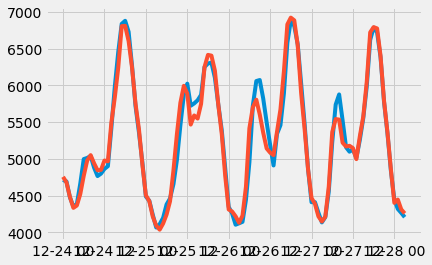

In [ ]:
plt.plot(final_preds['prediction'][0:100])
plt.plot(final_preds['actual'][0:100])

In [ ]:
final_preds.index[192],final_preds.index[936]

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-02-01 00:00:00'))

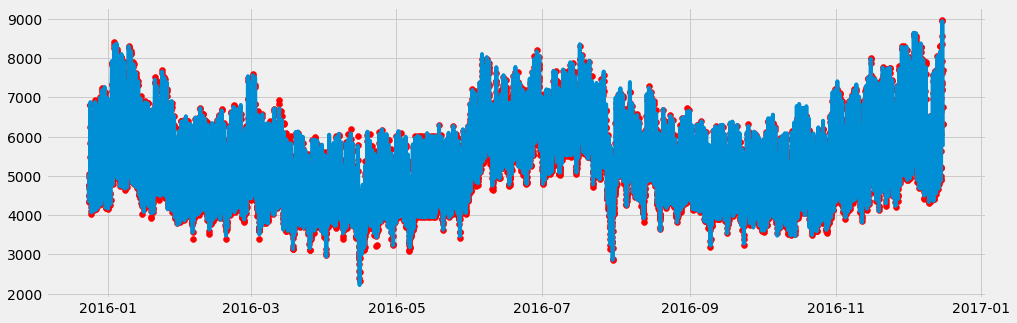

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index,final_preds.actual,color='r')
fig = plt.plot(final_preds.prediction)

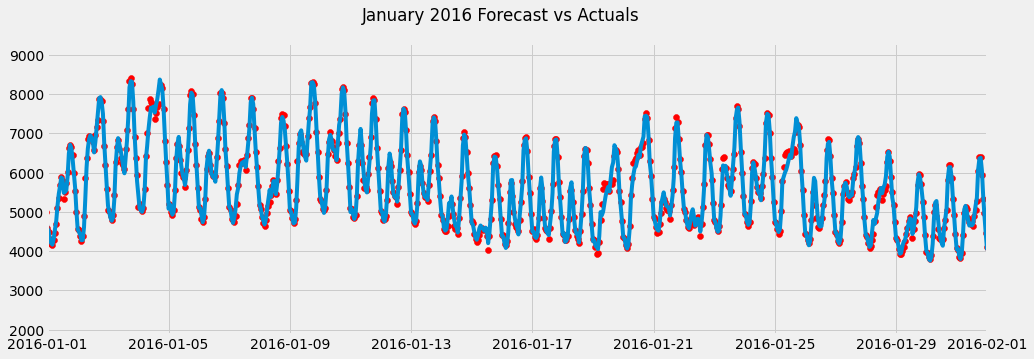

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index, final_preds['actual'], color='r')
fig = plt.plot(final_preds['prediction'])
ax.set_xbound(lower=final_preds.index[192],upper=final_preds.index[936])
plot = plt.suptitle('January 2016 Forecast vs Actuals')

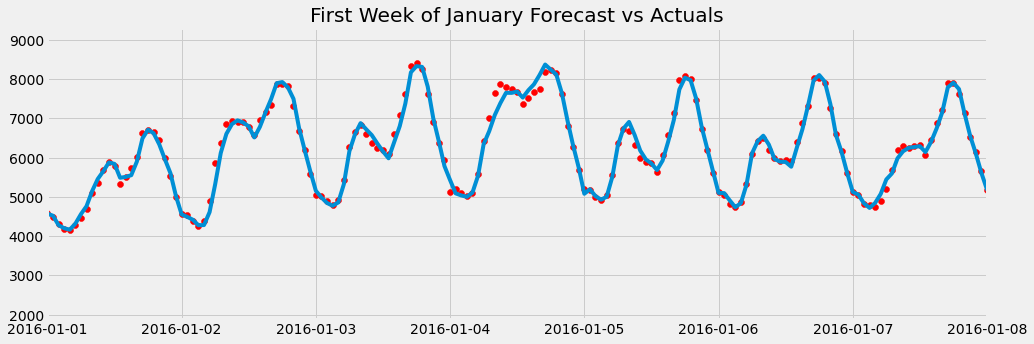

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index, final_preds['actual'], color='r')
fig = plt.plot(final_preds['prediction'])
ax.set_xbound(lower=final_preds.index[192], upper=final_preds.index[360])
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

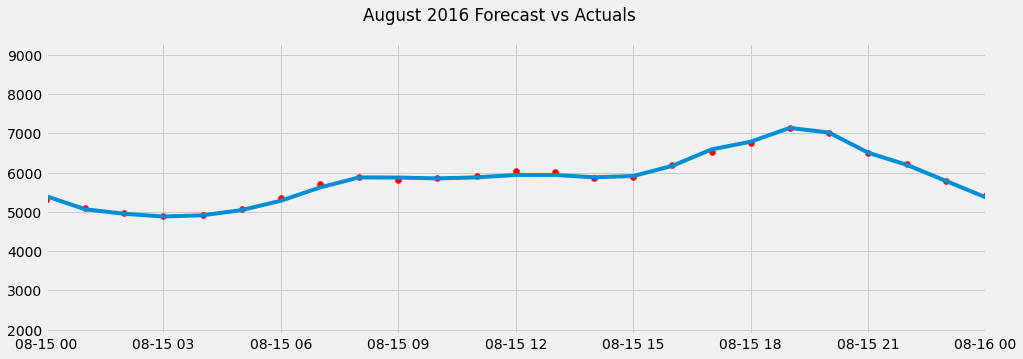

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index, final_preds['actual'], color='r')
fig = plt.plot(final_preds['prediction'])
ax.set_xbound(lower=final_preds.index[5640],
              upper=final_preds.index[5664])
plot = plt.suptitle('August 2016 Forecast vs Actuals')

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state = 1,objective='reg:squarederror',n_estimators=200,learning_rate=0.1,tree_method = "gpu_hist", single_precision_histogram=True)
    

In [ ]:
import pickle
filename_xgb = 'xgb_model.sav'
pickle.dump(xgbr, open(filename_xgb, 'wb'))

In [ ]:
%%time
final_preds = predictions(xgbr)

CPU times: user 764 ms, sys: 646 ms, total: 1.41 s
Wall time: 1.75 s


In [ ]:
final_preds

actual   prediction        diff
Datetime                                            
2015-12-24 00:00:00  4756.0  4788.570801   32.570801
2015-12-24 01:00:00  4680.0  4513.084473  166.915527
2015-12-24 02:00:00  4482.0  4440.560059   41.439941
2015-12-24 03:00:00  4334.0  4379.316895   45.316895
2015-12-24 04:00:00  4366.0  4391.162598   25.162598
...                     ...          ...         ...
2016-12-15 19:00:00  8563.0  8043.054688  519.945312
2016-12-15 20:00:00  7705.0  7702.244141    2.755859
2016-12-15 21:00:00  6759.0  7124.626465  365.626465
2016-12-15 22:00:00  6320.0  6196.651855  123.348145
2016-12-15 23:00:00  6320.0  5744.939941  575.060059

[8592 rows x 3 columns]

In [ ]:
mae_XGBoost  = mean_absolute_error(final_preds["actual"], final_preds["prediction"])

In [ ]:
mae_XGBoost

99.46478657926706

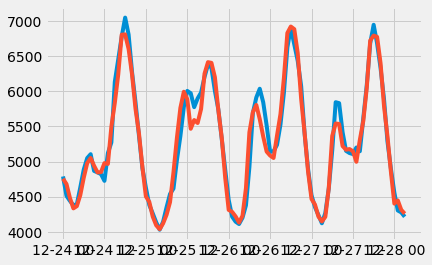

In [ ]:
plt.plot(final_preds['prediction'][0:100])
plt.plot(final_preds['actual'][0:100])

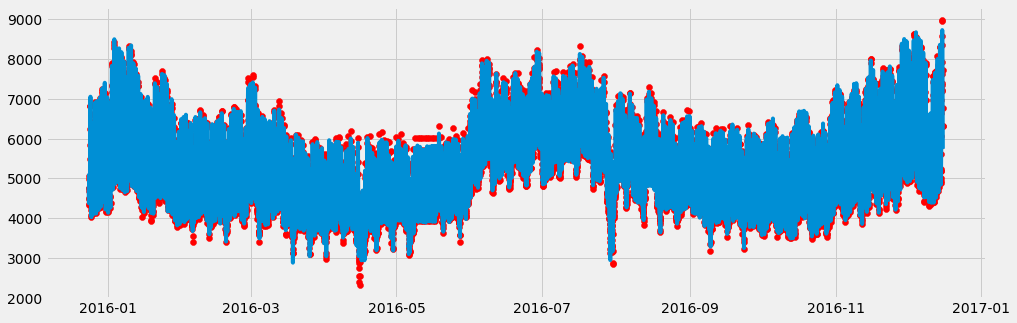

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index,final_preds.actual,color='r')
fig = plt.plot(final_preds.prediction)

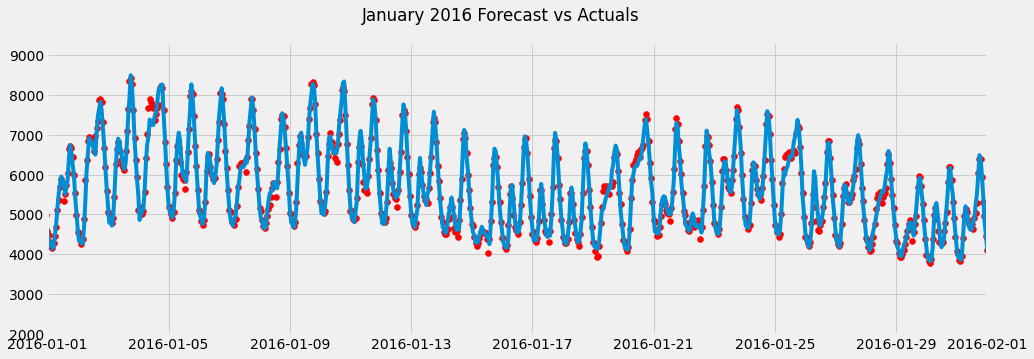

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index, final_preds['actual'], color='r')
fig = plt.plot(final_preds['prediction'])
ax.set_xbound(lower=final_preds.index[192],upper=final_preds.index[936])
plot = plt.suptitle('January 2016 Forecast vs Actuals')

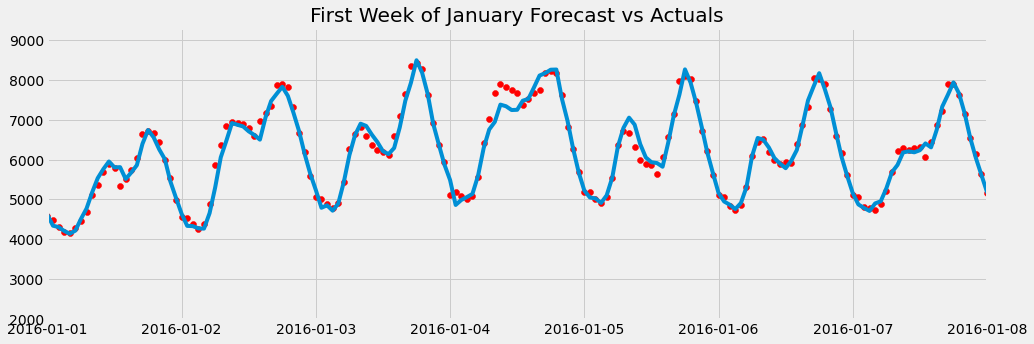

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index, final_preds['actual'], color='r')
fig = plt.plot(final_preds['prediction'])
ax.set_xbound(lower=final_preds.index[192], upper=final_preds.index[360])
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

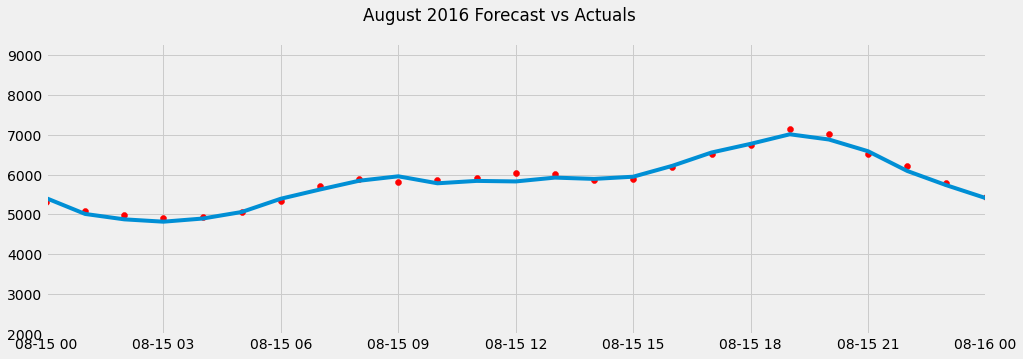

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(final_preds.index, final_preds['actual'], color='r')
fig = plt.plot(final_preds['prediction'])
ax.set_xbound(lower=final_preds.index[5640],
              upper=final_preds.index[5664])
plot = plt.suptitle('August 2016 Forecast vs Actuals')

In [ ]:
prophet_df = electricity_df.copy()
prophet_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  target  
Datetime                                                               
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0  
...                   ...   ...   ...   ...   ...   ...   ...     ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  6320.0  

[34680 rows x 17 columns]

In [ ]:
prophet_df.drop(['target'],axis=1,inplace=True)
prophet_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  
Datetime                                                       
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  
...                   ...   ...   ...   ...   ...   ...   ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  

[34680 rows x 16 columns]

In [ ]:
prophet_df['y'] = prophet_df.shift(-1)['P']
prophet_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P       y  
Datetime                                                               
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0  
...                   ...   ...   ...   ...   ...   ...   ...     ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320     NaN  

[34680 rows x 17 columns]

In [ ]:
prophet_df = prophet_df.ffill()
prophet_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P       y  
Datetime                                                               
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0  
...                   ...   ...   ...   ...   ...   ...   ...     ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  6320.0  

[34680 rows x 17 columns]

In [ ]:
prophet_df['ds'] = prophet_df.index
prophet_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P       y  \
Datetime                                                                
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0   
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0   
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0   
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0   
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0   
...                   ...   ...   ...   ...   ...   ...   ...     ...   
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0   
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0   
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0   
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0   
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  6320.0   

                                     ds  
Datetime                                 
2013-01-01 00:00:00 2013-01-01 00:00:00  
2013-01-01 01:00:00 2013-01-01 01:00:00  
2013-01-01 02:00:00 2013-01-01 02:00:00  
2013-01-01 03:00:00 2013-01-01 03:00:00  
2013-01-01 04:00:00 2013-01-01 04:00:00  
...                                 ...  
2016-12-15 19:00:00 2016-12-15 19:00:00  
2016-12-15 20:00:00 2016-12-15 20:00:00  
2016-12-15 21:00:00 2016-12-15 21:00:00  
2016-12-15 22:00:00 2016-12-15 22:00:00  
2016-12-15 23:00:00 2016-12-15 23:00:00  

[34680 rows x 18 columns]

In [ ]:
predictors = prophet_df.columns[~prophet_df.columns.isin(['y','ds'])]

In [ ]:
predictors

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P'],
      dtype='object')

In [ ]:
train = prophet_df.iloc[:26088]
test  = prophet_df.iloc[26088:]

In [ ]:
train

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2015-12-23 19:00:00  7571  7888  7889  7711  7291  6611  7184  7242  7145   
2015-12-23 20:00:00  7888  7889  7711  7291  6690  7184  7242  7145  6710   
2015-12-23 21:00:00  7889  7711  7291  6690  6179  7242  7145  6710  6149   
2015-12-23 22:00:00  7711  7291  6690  6179  5501  7145  6710  6149  5701   
2015-12-23 23:00:00  7291  6690  6179  5501  4959  6710  6149  5701  5089   

                        J     K     L     M     N     O     P       y  \
Datetime                                                                
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0   
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0   
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0   
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0   
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0   
...                   ...   ...   ...   ...   ...   ...   ...     ...   
2015-12-23 19:00:00  6710  6996  7592  7669  7492  6950  8937  8527.0   
2015-12-23 20:00:00  6149  7592  7669  7492  6950  6239  8527  7695.0   
2015-12-23 21:00:00  5701  7669  7492  6950  6239  5782  7695  6712.0   
2015-12-23 22:00:00  5089  7492  6950  6239  5782  5263  6712  6211.0   
2015-12-23 23:00:00  4605  6950  6239  5782  5263  4833  6211  5172.0   

                                     ds  
Datetime                                 
2013-01-01 00:00:00 2013-01-01 00:00:00  
2013-01-01 01:00:00 2013-01-01 01:00:00  
2013-01-01 02:00:00 2013-01-01 02:00:00  
2013-01-01 03:00:00 2013-01-01 03:00:00  
2013-01-01 04:00:00 2013-01-01 04:00:00  
...                                 ...  
2015-12-23 19:00:00 2015-12-23 19:00:00  
2015-12-23 20:00:00 2015-12-23 20:00:00  
2015-12-23 21:00:00 2015-12-23 21:00:00  
2015-12-23 22:00:00 2015-12-23 22:00:00  
2015-12-23 23:00:00 2015-12-23 23:00:00  

[26088 rows x 18 columns]

In [ ]:
test

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2015-12-24 00:00:00  6077  5629  5084  4611  4582  5540  5216  4764  4352   
2015-12-24 01:00:00  5629  5084  4611  4582  4405  5216  4764  4352  4317   
2015-12-24 02:00:00  5084  4611  4582  4405  4300  4764  4352  4317  4119   
2015-12-24 03:00:00  4611  4582  4405  4300  4366  4352  4317  4119  4026   
2015-12-24 04:00:00  4582  4405  4300  4366  4788  4317  4119  4026  4127   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P       y  \
Datetime                                                                
2015-12-24 00:00:00  4317  6333  6057  5585  5120  5043  5172  4756.0   
2015-12-24 01:00:00  4119  6057  5585  5120  5043  4799  4756  4680.0   
2015-12-24 02:00:00  4026  5585  5120  5043  4799  4626  4680  4482.0   
2015-12-24 03:00:00  4127  5120  5043  4799  4626  4640  4482  4334.0   
2015-12-24 04:00:00  4498  5043  4799  4626  4640  4790  4334  4366.0   
...                   ...   ...   ...   ...   ...   ...   ...     ...   
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0   
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0   
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0   
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0   
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  6320.0   

                                     ds  
Datetime                                 
2015-12-24 00:00:00 2015-12-24 00:00:00  
2015-12-24 01:00:00 2015-12-24 01:00:00  
2015-12-24 02:00:00 2015-12-24 02:00:00  
2015-12-24 03:00:00 2015-12-24 03:00:00  
2015-12-24 04:00:00 2015-12-24 04:00:00  
...                                 ...  
2016-12-15 19:00:00 2016-12-15 19:00:00  
2016-12-15 20:00:00 2016-12-15 20:00:00  
2016-12-15 21:00:00 2016-12-15 21:00:00  
2016-12-15 22:00:00 2016-12-15 22:00:00  
2016-12-15 23:00:00 2016-12-15 23:00:00  

[8592 rows x 18 columns]

In [ ]:
def prophet_fit(train):
  model = Prophet()
  for p in predictors:
    model.add_regressor(p)
  model.fit(train)
  return model

In [ ]:
model = prophet_fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/lceyxoys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/9kgrj7vr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68972', 'data', 'file=/tmp/tmp79mkk7bl/lceyxoys.json', 'init=/tmp/tmp79mkk7bl/9kgrj7vr.json', 'output', 'file=/tmp/tmp79mkk7bl/prophet_model1m00smqg/prophet_model-20221210153609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:36:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predictions = model.predict(test)

In [ ]:
predictions

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2015-12-24 00:00:00  5290.741501  4572.669056  4834.869112  5290.741501   
1    2015-12-24 01:00:00  5290.741262  4553.652475  4825.593942  5290.741262   
2    2015-12-24 02:00:00  5290.741023  4349.497926  4612.348864  5290.741023   
3    2015-12-24 03:00:00  5290.740784  4223.179889  4483.130402  5290.740784   
4    2015-12-24 04:00:00  5290.740545  4258.982853  4527.687699  5290.740545   
...                  ...          ...          ...          ...          ...   
8587 2016-12-15 19:00:00  5288.689659  8511.662172  8772.629095  5278.936117   
8588 2016-12-15 20:00:00  5288.689420  7792.048845  8049.541696  5278.934420   
8589 2016-12-15 21:00:00  5288.689181  6986.829165  7260.473962  5278.932722   
8590 2016-12-15 22:00:00  5288.688942  6197.984285  6467.904805  5278.931025   
8591 2016-12-15 23:00:00  5288.688703  5608.937064  5871.811107  5278.929327   

      trend_upper           A     A_lower     A_upper           B  ...  \
0     5290.741501  -32.425965  -32.425965  -32.425965   18.409165  ...   
1     5290.741262  -13.907886  -13.907886  -13.907886  -11.409699  ...   
2     5290.741023    8.619687    8.619687    8.619687  -37.289190  ...   
3     5290.740784   28.171141   28.171141   28.171141  -38.875882  ...   
4     5290.740545   29.369856   29.369856   29.369856  -48.560173  ...   
...           ...         ...         ...         ...         ...  ...   
8587  5299.645612 -104.431529 -104.431529 -104.431529  164.494242  ...   
8588  5299.647641 -124.272328 -124.272328 -124.272328  164.658383  ...   
8589  5299.649669 -124.396333 -124.396333 -124.396333  144.906805  ...   
8590  5299.651698 -109.474399 -109.474399 -109.474399  108.139325  ...   
8591  5299.653726  -81.697281  -81.697281  -81.697281   81.165563  ...   

        weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0    -2.079156     -2.079156     -2.079156  2.305323      2.305323   
1    -1.858422     -1.858422     -1.858422  2.301957      2.301957   
2    -1.616901     -1.616901     -1.616901  2.298666      2.298666   
3    -1.362265     -1.362265     -1.362265  2.295451      2.295451   
4    -1.102658     -1.102658     -1.102658  2.292311      2.292311   
...        ...           ...           ...       ...           ...   
8587 -2.089642     -2.089642     -2.089642  4.074272      4.074272   
8588 -2.743682     -2.743682     -2.743682  4.058973      4.058973   
8589 -3.480926     -3.480926     -3.480926  4.043715      4.043715   
8590 -4.297756     -4.297756     -4.297756  4.028500      4.028500   
8591 -5.189278     -5.189278     -5.189278  4.013328      4.013328   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         2.305323                   0.0                         0.0   
1         2.301957                   0.0                         0.0   
2         2.298666                   0.0                         0.0   
3         2.295451                   0.0                         0.0   
4         2.292311                   0.0                         0.0   
...            ...                   ...                         ...   
8587      4.074272                   0.0                         0.0   
8588      4.058973                   0.0                         0.0   
8589      4.043715                   0.0                         0.0   
8590      4.028500                   0.0                         0.0   
8591      4.013328                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
0                            0.0  4707.693983  
1                            0.0  4689.861530  
2                            0.0  4473.717540  
3                            0.0  4353.828002  
4                            0.0  4389.920964  
...                          ...          ...  
8587                         0.0  8640.056127  
8588                         0.0  7927.346107  
8589                         0.0  

In [ ]:
test['y']

Datetime
2015-12-24 00:00:00    4756.0
2015-12-24 01:00:00    4680.0
2015-12-24 02:00:00    4482.0
2015-12-24 03:00:00    4334.0
2015-12-24 04:00:00    4366.0
                        ...  
2016-12-15 19:00:00    8563.0
2016-12-15 20:00:00    7705.0
2016-12-15 21:00:00    6759.0
2016-12-15 22:00:00    6320.0
2016-12-15 23:00:00    6320.0
Name: y, Length: 8592, dtype: float64

In [ ]:
predictions['yhat']

0       4707.693983
1       4689.861530
2       4473.717540
3       4353.828002
4       4389.920964
           ...     
8587    8640.056127
8588    7927.346107
8589    7130.799668
8590    6333.479771
8591    5745.383704
Name: yhat, Length: 8592, dtype: float64

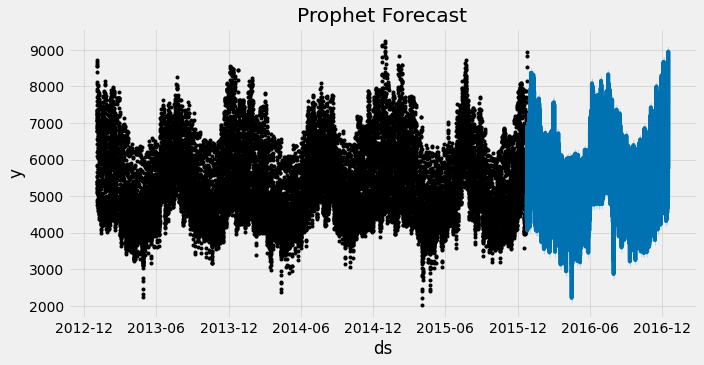

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(predictions, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.utilities import regressor_coefficients

plot_components_plotly(model, predictions)

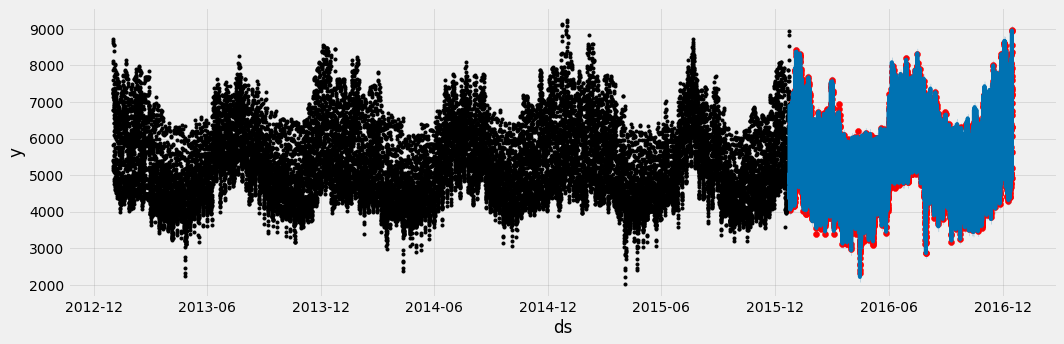

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['y'], color='r')
fig = model.plot(predictions, ax=ax)

In [ ]:
test.index

DatetimeIndex(['2015-12-24 00:00:00', '2015-12-24 01:00:00',
               '2015-12-24 02:00:00', '2015-12-24 03:00:00',
               '2015-12-24 04:00:00', '2015-12-24 05:00:00',
               '2015-12-24 06:00:00', '2015-12-24 07:00:00',
               '2015-12-24 08:00:00', '2015-12-24 09:00:00',
               ...
               '2016-12-15 14:00:00', '2016-12-15 15:00:00',
               '2016-12-15 16:00:00', '2016-12-15 17:00:00',
               '2016-12-15 18:00:00', '2016-12-15 19:00:00',
               '2016-12-15 20:00:00', '2016-12-15 21:00:00',
               '2016-12-15 22:00:00', '2016-12-15 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=8592, freq=None)

In [ ]:
prophet_df.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-15 14:00:00', '2016-12-15 15:00:00',
               '2016-12-15 16:00:00', '2016-12-15 17:00:00',
               '2016-12-15 18:00:00', '2016-12-15 19:00:00',
               '2016-12-15 20:00:00', '2016-12-15 21:00:00',
               '2016-12-15 22:00:00', '2016-12-15 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=34680, freq=None)

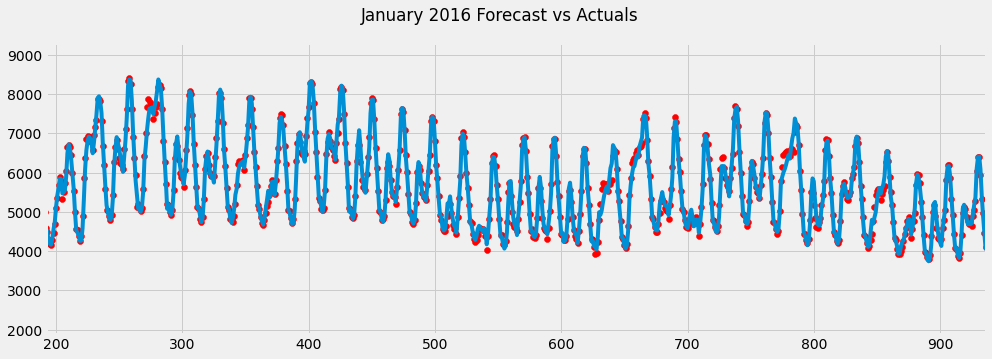

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter( predictions.index, test['y'], color='r')
fig = plt.plot(predictions['yhat'])
ax.set_xbound(lower=predictions.index[192],upper=predictions.index[936])
plot = plt.suptitle('January 2016 Forecast vs Actuals')

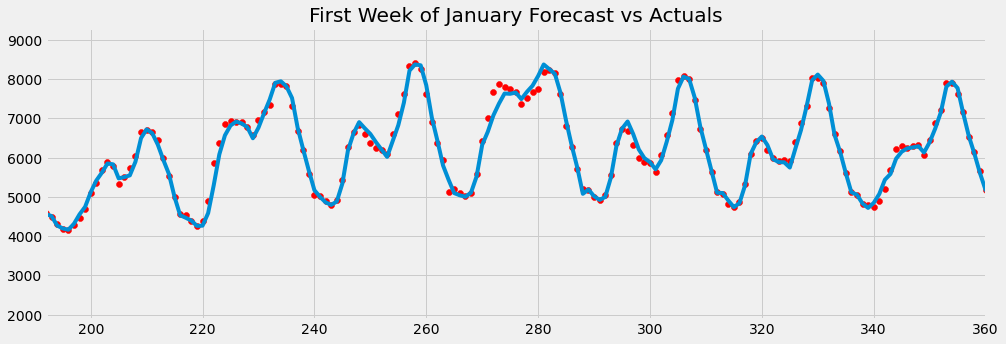

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(predictions.index, test['y'], color='r')
fig = plt.plot(predictions['yhat'])
ax.set_xbound(lower=predictions.index[192], upper=predictions.index[360])
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

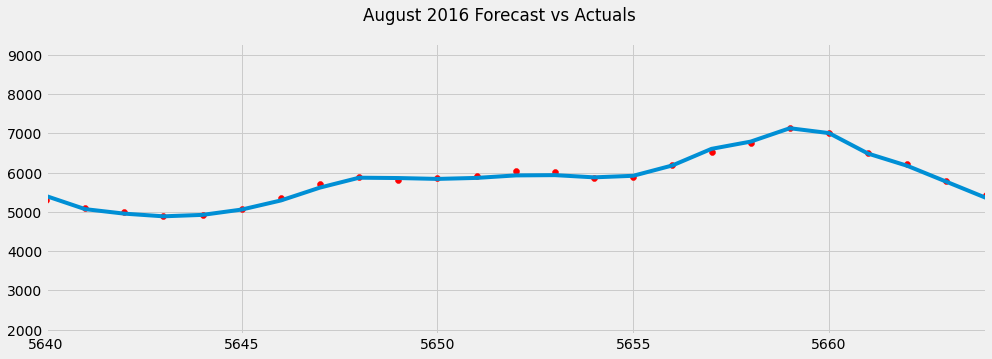

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(predictions.index, test['y'], color='r')
fig = plt.plot(predictions['yhat'])
ax.set_xbound(lower=predictions.index[5640],
              upper=predictions.index[5664])
plot = plt.suptitle('August 2016 Forecast vs Actuals')

In [ ]:
regressor_coefficients(model)

regressor regressor_mode       center  coef_lower      coef  coef_upper
0          A       additive  5292.532429   -0.041335 -0.041335   -0.041335
1          B       additive  5292.535304    0.054714  0.054714    0.054714
2          C       additive  5292.536760   -0.415403 -0.415403   -0.415403
3          D       additive  5292.535840    0.401468  0.401468    0.401468
4          E       additive  5292.532735    0.023828  0.023828    0.023828
5          F       additive  5292.660802    0.013972  0.013972    0.013972
6          G       additive  5292.652867    0.008412  0.008412    0.008412
7          H       additive  5292.640141   -0.128950 -0.128950   -0.128950
8          I       additive  5292.626533    0.131372  0.131372    0.131372
9          J       additive  5292.617295   -0.022832 -0.022832   -0.022832
10         K       additive  5295.722746    0.033668  0.033668    0.033668
11         L       additive  5295.742717   -0.063633 -0.063633   -0.063633
12         M       additive  5295.753182   -0.352036 -0.352036   -0.352036
13         N       additive  5295.762151    0.418879  0.418879    0.418879
14         O       additive  5295.771351   -0.026532 -0.026532   -0.026532
15         P       additive  5292.381440    0.955731  0.955731    0.955731

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_prophet = mean_absolute_error(y_true=test['y'],
                   y_pred=predictions['yhat'])

In [ ]:
mae_prophet

74.8544833905909

In [ ]:
# Cross validate across data set
from prophet.diagnostics import cross_validation, performance_metrics


model = prophet_fit(prophet_df)
cv = cross_validation(model, initial='1087 days',period='119 days', horizon = '119 days', parallel="processes")

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/uo_iw7pf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/zh_1yjdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24694', 'data', 'file=/tmp/tmp79mkk7bl/uo_iw7pf.json', 'init=/tmp/tmp79mkk7bl/zh_1yjdz.json', 'output', 'file=/tmp/tmp79mkk7bl/prophet_model3lr5o8k6/prophet_model-20221210162404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 3 forecasts with cutoffs between 2015-12-24 23:00:00 and 2016-08-18 23:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1d80d53cd0>
DEBUG:cmdstanpy:input tempfile: /

In [ ]:
cv

ds         yhat   yhat_lower   yhat_upper       y  \
0    2015-12-25 00:00:00  4478.936161  4342.359508  4610.981364  4505.0   
1    2015-12-25 01:00:00  4421.832525  4290.098105  4559.373453  4425.0   
2    2015-12-25 02:00:00  4233.276208  4107.032366  4360.072623  4216.0   
3    2015-12-25 03:00:00  4062.180490  3932.635460  4191.757124  4093.0   
4    2015-12-25 04:00:00  4109.599202  3976.265002  4234.149420  4037.0   
...                  ...          ...          ...          ...     ...   
8563 2016-12-15 19:00:00  8646.429553  8509.443018  8778.955219  8563.0   
8564 2016-12-15 20:00:00  7933.007729  7800.764045  8066.055353  7705.0   
8565 2016-12-15 21:00:00  7132.423509  7001.144350  7266.278908  6759.0   
8566 2016-12-15 22:00:00  6332.447283  6202.961472  6472.584085  6320.0   
8567 2016-12-15 23:00:00  5746.068765  5608.646789  5872.807167  6320.0   

                  cutoff  
0    2015-12-24 23:00:00  
1    2015-12-24 23:00:00  
2    2015-12-24 23:00:00  
3    2015-12-24 23:00:00  
4    2015-12-24 23:00:00  
...                  ...  
8563 2016-08-18 23:00:00  
8564 2016-08-18 23:00:00  
8565 2016-08-18 23:00:00  
8566 2016-08-18 23:00:00  
8567 2016-08-18 23:00:00  

[8568 rows x 6 columns]

In [ ]:
mae_cv_prophet = mean_absolute_error(y_true=cv['y'],
                   y_pred=cv['yhat'])

In [ ]:
mae_cv_prophet

74.707339111094

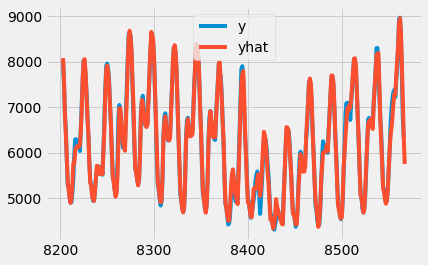

In [ ]:
cv[['y','yhat']][-365:].plot()

In [ ]:
m = Prophet()
m.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/4ghgmors.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/6er7j2ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10267', 'data', 'file=/tmp/tmp79mkk7bl/4ghgmors.json', 'init=/tmp/tmp79mkk7bl/6er7j2ml.json', 'output', 'file=/tmp/tmp79mkk7bl/prophet_model5i0bl4jz/prophet_model-20221210162607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict one day ahead with high accuracy
md = prophet_fit(prophet_df)
md.predict(prophet_df.iloc[-24:])

DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/61o3u8kx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp79mkk7bl/iol598al.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71718', 'data', 'file=/tmp/tmp79mkk7bl/61o3u8kx.json', 'init=/tmp/tmp79mkk7bl/iol598al.json', 'output', 'file=/tmp/tmp79mkk7bl/prophet_modelfif13glz/prophet_model-20221210162645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2016-12-15 00:00:00  5274.884984  5079.248169  5349.605087  5274.884984   
1  2016-12-15 01:00:00  5274.885495  5010.926758  5288.766658  5274.885495   
2  2016-12-15 02:00:00  5274.886005  4838.422931  5093.221278  5274.886005   
3  2016-12-15 03:00:00  5274.886515  4740.124481  5008.375157  5274.886515   
4  2016-12-15 04:00:00  5274.887025  4816.476376  5084.649403  5274.887025   
5  2016-12-15 05:00:00  5274.887535  5028.773485  5298.125697  5274.887535   
6  2016-12-15 06:00:00  5274.888045  5528.339502  5791.681620  5274.888045   
7  2016-12-15 07:00:00  5274.888556  5938.986319  6211.767446  5274.888556   
8  2016-12-15 08:00:00  5274.889066  6262.097451  6527.705959  5274.889066   
9  2016-12-15 09:00:00  5274.889576  6430.549107  6703.786417  5274.889576   
10 2016-12-15 10:00:00  5274.890086  6665.577857  6934.564521  5274.890086   
11 2016-12-15 11:00:00  5274.890596  6973.791908  7233.652652  5274.890596   
12 2016-12-15 12:00:00  5274.891106  7164.859145  7433.826667  5274.891106   
13 2016-12-15 13:00:00  5274.891617  7150.149821  7415.694265  5274.891617   
14 2016-12-15 14:00:00  5274.892127  7575.584980  7847.368531  5274.892127   
15 2016-12-15 15:00:00  5274.892637  7878.364024  8142.200266  5274.892637   
16 2016-12-15 16:00:00  5274.893147  8253.660431  8520.891574  5274.893147   
17 2016-12-15 17:00:00  5274.893657  8714.683851  8988.545721  5274.893657   
18 2016-12-15 18:00:00  5274.894168  8827.372215  9094.039221  5274.894168   
19 2016-12-15 19:00:00  5274.894678  8513.893852  8778.910330  5274.894678   
20 2016-12-15 20:00:00  5274.895188  7790.384376  8062.495935  5274.895188   
21 2016-12-15 21:00:00  5274.895698  7007.195120  7273.915414  5274.895698   
22 2016-12-15 22:00:00  5274.896208  6205.123895  6461.512723  5274.896208   
23 2016-12-15 23:00:00  5274.896718  5612.975271  5884.860320  5274.896718   

    trend_upper           A     A_lower     A_upper           B  ...  \
0   5274.884984  -67.346309  -67.346309  -67.346309   52.445796  ...   
1   5274.885495  -44.672110  -44.672110  -44.672110   19.833051  ...   
2   5274.886005  -16.893959  -16.893959  -16.893959  -10.605511  ...   
3   5274.886515    9.032316    9.032316    9.032316  -14.582675  ...   
4   5274.887025   12.419895   12.419895   12.419895  -27.362628  ...   
5   5274.887535   23.305317   23.305317   23.305317  -31.604936  ...   
6   5274.888045   26.918735   26.918735   26.918735  -26.036907  ...   
7   5274.888556   22.176124   22.176124   22.176124  -11.347915  ...   
8   5274.889066    9.664664    9.664664    9.664664   18.560359  ...   
9   5274.889576  -15.809934  -15.809934  -15.809934   51.491276  ...   
10  5274.890086  -43.859091  -43.859091  -43.859091   77.369357  ...   
11  5274.890596  -65.900942  -65.900942  -65.900942   79.119309  ...   
12  5274.891106  -67.391476  -67.391476  -67.391476   76.255751  ...   
13  5274.891617  -64.952419  -64.952419  -64.952419   73.286135  ...   
14  5274.892127  -62.423027  -62.423027  -62.423027   74.877000  ...   
15  5274.892637  -63.778058  -63.778058  -63.778058   72.914933  ...   
16  5274.893147  -62.106853  -62.106853  -62.106853   98.262725  ...   
17  5274.893657  -83.697026  -83.697026  -83.697026  114.701669  ...   
18  5274.894168  -97.699021  -97.699021  -97.699021  135.064749  ...   
19  5274.894678 -115.043427 -115.043427 -115.043427  160.518598  ...   
20  5274.895188 -136.723936 -136.723936 -136.723936  160.677685  ...   
21  5274.895698 -136.859439 -136.859439 -136.859439  141.534269  ...   
22  5274.896208 -120.553890 -120.553890 -120.553890  105.898880  ...   
23  5274.896718  -90.201178  -90.201178  -90.201178   79.755655  ...   

      weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0  -2.830161     -2.830161     -2.830161  4.519031      4.519031   
1  -2.899164     -2.899164     -2.899164  4.509439      4.509439   
2  -2.968070     -2.968070     -2.968070  4.499906      4.499906

In [ ]:
future = m.make_future_dataframe(periods=365*24, freq='h',include_history=False)

In [ ]:
future_forecast=m.predict(future)

In [ ]:
plot_plotly(m,future_forecast)

In [ ]:
maes = [mae_Ridge,mae_XGBoost,mae_prophet,mae_cv_prophet]

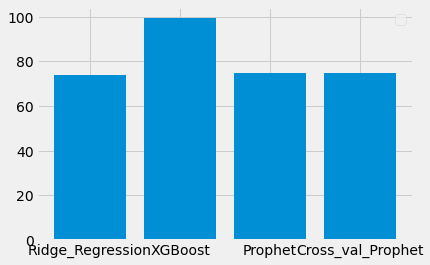

In [ ]:
height = maes
bars = ['Ridge_Regression','XGBoost','Prophet','Cross_val_Prophet']
plt.bar(bars, height)
plt.legend()
 


In [ ]:
electricity_df

A     B     C     D     E     F     G     H     I  \
Datetime                                                                    
2013-01-01 00:00:00  6615  6141  5525  5040  5011  6356  6033  5444  4846   
2013-01-01 01:00:00  6141  5525  5040  5011  4817  6033  5444  4846  4834   
2013-01-01 02:00:00  5525  5040  5011  4817  4685  5444  4846  4834  4658   
2013-01-01 03:00:00  5040  5011  4817  4685  4784  4846  4834  4658  4510   
2013-01-01 04:00:00  5011  4817  4685  4784  5321  4834  4658  4510  4554   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016-12-15 19:00:00  7819  8299  8302  7941  7269  7715  8061  8040  7837   
2016-12-15 20:00:00  8299  8302  7941  7269  6776  8061  8040  7837  7332   
2016-12-15 21:00:00  8302  7941  7269  6776  6395  8040  7837  7332  6763   
2016-12-15 22:00:00  7941  7269  6776  6395  5779  7837  7332  6763  6261   
2016-12-15 23:00:00  7269  6776  6395  5779  5232  7332  6763  6261  5646   

                        J     K     L     M     N     O     P  target  
Datetime                                                               
2013-01-01 00:00:00  4834  5718  5509  5029  4593  4598  5925  5427.0  
2013-01-01 01:00:00  4658  5509  5029  4593  4598  4374  5427  5387.0  
2013-01-01 02:00:00  4510  5029  4593  4598  4374  4246  5387  5207.0  
2013-01-01 03:00:00  4554  4593  4598  4374  4246  4278  5207  5146.0  
2013-01-01 04:00:00  4988  4598  4374  4246  4278  4591  5146  5264.0  
...                   ...   ...   ...   ...   ...   ...   ...     ...  
2016-12-15 19:00:00  7332  7159  7837  7901  7584  6957  8971  8563.0  
2016-12-15 20:00:00  6763  7837  7901  7584  6957  6348  8563  7705.0  
2016-12-15 21:00:00  6261  7901  7584  6957  6348  5947  7705  6759.0  
2016-12-15 22:00:00  5646  7584  6957  6348  5947  5414  6759  6320.0  
2016-12-15 23:00:00  5072  6957  6348  5947  5414  4980  6320  6320.0  

[34680 rows x 17 columns]

In [ ]:
electricity_df.shape

(34680, 17)

In [ ]:
electricity_df.columns[16]

'target'

In [ ]:
from numpy import array

def split_sequence(df,window_size=24):
  df_np = df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_np)-window_size):
    row = [r for r in df_np[i:i+window_size]]
    X.append(row)
    label = df_np[i+window_size][-1]
    y.append(label)
  return np.array(X),np.array(y)
  







In [ ]:
X,y =  split_sequence(electricity_df)
X.shape,y.shape

((34656, 24, 17), (34656,))

In [ ]:
X_train , y_train = X[:26088,:,:16], y[:26088]
X_test , y_test  = X[26088:,:,:16], y[26088:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26088, 24, 16), (26088,), (8568, 24, 16), (8568,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
# define parameters
verbose, epochs, batch_size = 2, 50, 16
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

In [ ]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               173600    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 193,801
Trainable params: 193,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# save model
model.save('lstmModel.h5')
print('Model Saved!')

Model Saved!


In [ ]:
%%time
model.fit(X_train,y_train,epochs=epochs,verbose=verbose)

Epoch 1/50
816/816 - 39s - loss: 778.1496 - 39s/epoch - 47ms/step
Epoch 2/50
816/816 - 36s - loss: 492.9472 - 36s/epoch - 44ms/step
Epoch 3/50
816/816 - 34s - loss: 379.0273 - 34s/epoch - 41ms/step
Epoch 4/50
816/816 - 33s - loss: 338.5738 - 33s/epoch - 40ms/step
Epoch 5/50
816/816 - 33s - loss: 320.4961 - 33s/epoch - 40ms/step
Epoch 6/50
816/816 - 32s - loss: 291.5326 - 32s/epoch - 40ms/step
Epoch 7/50
816/816 - 32s - loss: 297.4009 - 32s/epoch - 39ms/step
Epoch 8/50
816/816 - 34s - loss: 273.0273 - 34s/epoch - 41ms/step
Epoch 9/50
816/816 - 32s - loss: 256.6938 - 32s/epoch - 39ms/step
Epoch 10/50
816/816 - 33s - loss: 222.6226 - 33s/epoch - 40ms/step
Epoch 11/50
816/816 - 36s - loss: 222.9122 - 36s/epoch - 44ms/step
Epoch 12/50
816/816 - 32s - loss: 211.2032 - 32s/epoch - 40ms/step
Epoch 13/50
816/816 - 32s - loss: 202.3656 - 32s/epoch - 40ms/step
Epoch 14/50
816/816 - 32s - loss: 172.2153 - 32s/epoch - 39ms/step
Epoch 15/50
816/816 - 33s - loss: 165.1608 - 33s/epoch - 41ms/step
Epoc

In [ ]:

train_predictions = model.predict(X_train)
len(train_predictions)

816/816 [==============================] - 5s 6ms/step


26088

In [ ]:
len(y_train.flatten())

26088

In [ ]:
len(train_predictions.flatten())

26088

In [ ]:
train.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2015-12-23 14:00:00', '2015-12-23 15:00:00',
               '2015-12-23 16:00:00', '2015-12-23 17:00:00',
               '2015-12-23 18:00:00', '2015-12-23 19:00:00',
               '2015-12-23 20:00:00', '2015-12-23 21:00:00',
               '2015-12-23 22:00:00', '2015-12-23 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=26088, freq=None)

In [ ]:
train_results = pd.DataFrame(data={'Train Predictions':train_predictions.flatten(), 'Actuals':y_train.flatten()},index = train.index)
train_results

Train Predictions  Actuals
Datetime                                       
2013-01-01 00:00:00        5478.291504   5548.0
2013-01-01 01:00:00        5435.025879   5515.0
2013-01-01 02:00:00        5144.371094   5380.0
2013-01-01 03:00:00        5098.165039   5210.0
2013-01-01 04:00:00        5279.142090   5325.0
...                                ...      ...
2015-12-23 19:00:00        6783.173828   6603.0
2015-12-23 20:00:00        6357.874512   6239.0
2015-12-23 21:00:00        5627.752930   5751.0
2015-12-23 22:00:00        5306.946289   5402.0
2015-12-23 23:00:00        4902.332520   4920.0

[26088 rows x 2 columns]

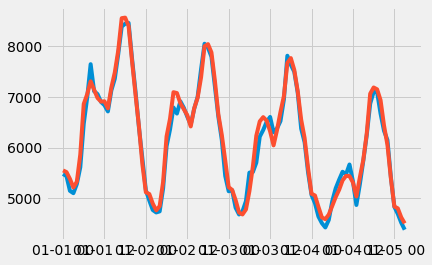

In [ ]:
plt.plot(train_results['Train Predictions'][0:100])
plt.plot(train_results['Actuals'][0:100])

In [ ]:
test_predictions = model.predict(X_test)
test_predictions

268/268 [==============================] - 2s 6ms/step


array([[4473.4453],
       [4325.4604],
       [4161.76  ],
       ...,
       [7138.364 ],
       [6466.4014],
       [5455.815 ]], dtype=float32)

In [ ]:
X_test.shape

(8568, 24, 16)

In [ ]:
test_predictions.shape

(8568, 1)

In [ ]:
len(y_test.flatten())

8568

In [ ]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test.flatten()},index=cv['ds'])
test_results

Test Predictions  Actuals
ds                                            
2015-12-25 00:00:00       4473.445312   4505.0
2015-12-25 01:00:00       4325.460449   4425.0
2015-12-25 02:00:00       4161.759766   4216.0
2015-12-25 03:00:00       4008.460205   4093.0
2015-12-25 04:00:00       3986.922852   4037.0
...                               ...      ...
2016-12-15 19:00:00       8543.278320   8563.0
2016-12-15 20:00:00       7842.072754   7705.0
2016-12-15 21:00:00       7138.363770   6759.0
2016-12-15 22:00:00       6466.401367   6320.0
2016-12-15 23:00:00       5455.814941   6320.0

[8568 rows x 2 columns]

In [ ]:
mae_lstm = mean_absolute_error(test_results["Test Predictions"], test_results["Actuals"])

In [ ]:
mae_lstm

128.64498931286383

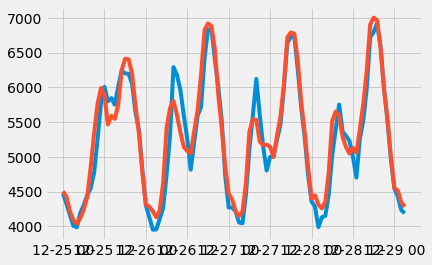

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
fig = tf.keras.utils.plot_model(model)

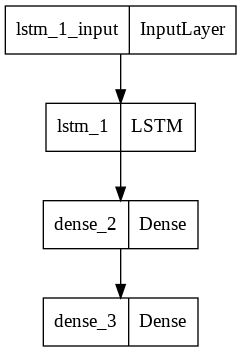

In [ ]:
fig

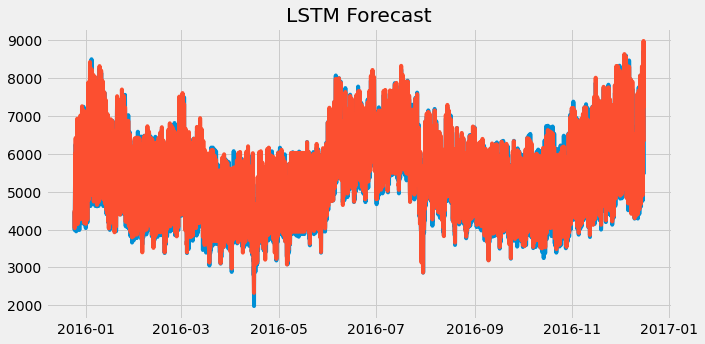

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = plt.plot(test_results)
ax.set_title('LSTM Forecast')
plt.show()

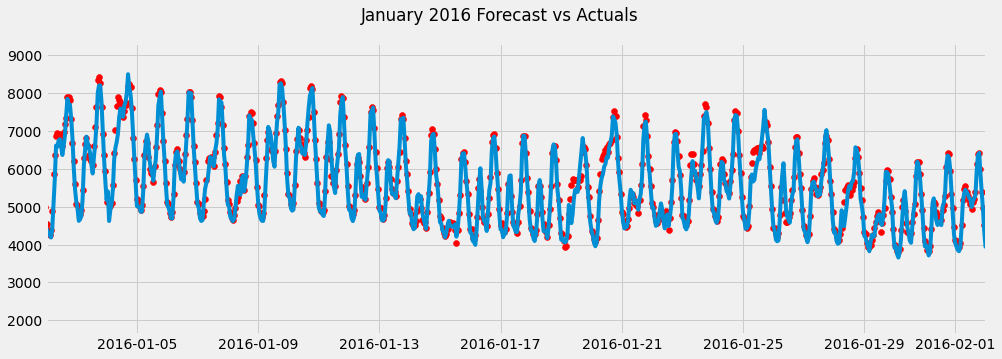

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[192],upper=test_results.index[936])
plot = plt.suptitle('January 2016 Forecast vs Actuals')

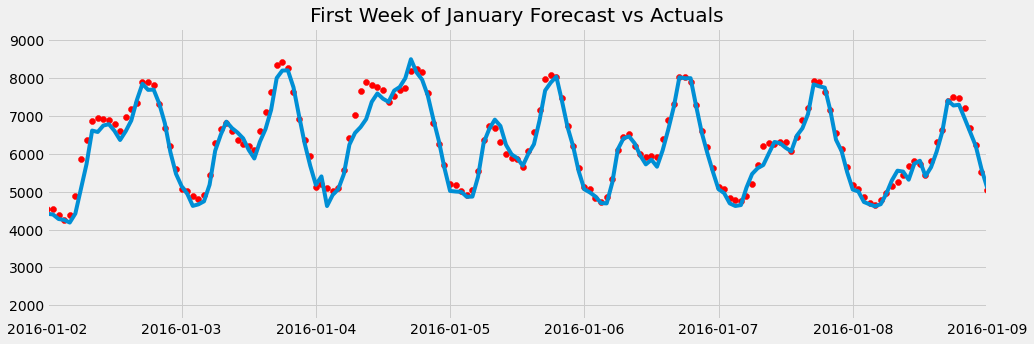

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[192], upper=test_results.index[360])
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

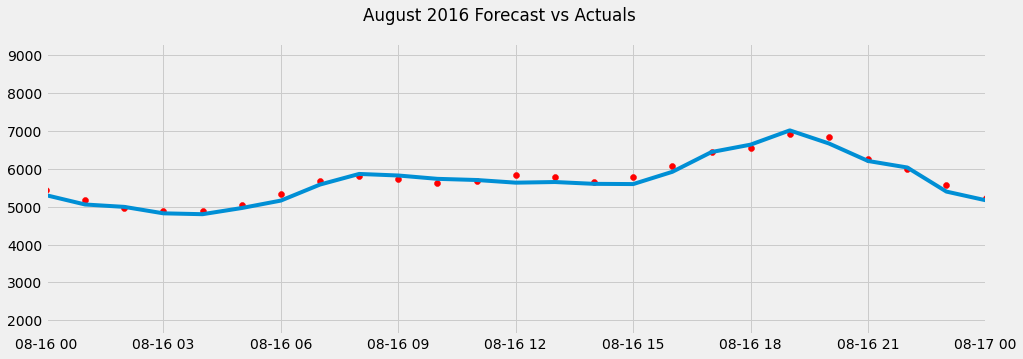

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[5640],
              upper=test_results.index[5664])
plot = plt.suptitle('August 2016 Forecast vs Actuals')

In [ ]:
window_size = 24
y_train = y_train.reshape((y_train.shape[0], 1, 1))

In [ ]:
n_outputs = y_train.shape[1]

In [ ]:
verbose, epochs, batch_size = 2, 30, 16

In [ ]:
# define cnn input model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 64)            3136      
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 640)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 200)           

In [ ]:
# save model
model.save('Cnn_Lstm_Model.h5')
print('Model Saved!')

Model Saved!


In [ ]:
# fit network
%%time
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/30
1631/1631 - 17s - loss: 379.5300 - 17s/epoch - 11ms/step
Epoch 2/30
1631/1631 - 10s - loss: 244.0349 - 10s/epoch - 6ms/step
Epoch 3/30
1631/1631 - 11s - loss: 197.2623 - 11s/epoch - 7ms/step
Epoch 4/30
1631/1631 - 10s - loss: 186.2994 - 10s/epoch - 6ms/step
Epoch 5/30
1631/1631 - 10s - loss: 175.5941 - 10s/epoch - 6ms/step
Epoch 6/30
1631/1631 - 10s - loss: 176.9627 - 10s/epoch - 6ms/step
Epoch 7/30
1631/1631 - 11s - loss: 162.0600 - 11s/epoch - 7ms/step
Epoch 8/30
1631/1631 - 11s - loss: 175.7962 - 11s/epoch - 7ms/step
Epoch 9/30
1631/1631 - 13s - loss: 169.4018 - 13s/epoch - 8ms/step
Epoch 10/30
1631/1631 - 11s - loss: 158.7423 - 11s/epoch - 7ms/step
Epoch 11/30
1631/1631 - 10s - loss: 159.1032 - 10s/epoch - 6ms/step
Epoch 12/30
1631/1631 - 10s - loss: 155.1650 - 10s/epoch - 6ms/step
Epoch 13/30
1631/1631 - 10s - loss: 157.3310 - 10s/epoch - 6ms/step
Epoch 14/30
1631/1631 - 10s - loss: 156.2785 - 10s/epoch - 6ms/step
Epoch 15/30
1631/1631 - 10s - loss: 156.4596 - 10s/epoch

In [ ]:
train_predictions = model.predict(X_train)
len(train_predictions)

816/816 [==============================] - 3s 4ms/step


26088

In [ ]:
train_results = pd.DataFrame(data={'Train Predictions':train_predictions.flatten(), 'Actuals':y_train.flatten()},index = train.index)
train_results

Train Predictions  Actuals
Datetime                                       
2013-01-01 00:00:00        5612.530273   5548.0
2013-01-01 01:00:00        5540.197754   5515.0
2013-01-01 02:00:00        5383.701660   5380.0
2013-01-01 03:00:00        5233.262695   5210.0
2013-01-01 04:00:00        5456.495605   5325.0
...                                ...      ...
2015-12-23 19:00:00        6867.396973   6603.0
2015-12-23 20:00:00        6564.204590   6239.0
2015-12-23 21:00:00        5856.454102   5751.0
2015-12-23 22:00:00        5414.411133   5402.0
2015-12-23 23:00:00        5004.262695   4920.0

[26088 rows x 2 columns]

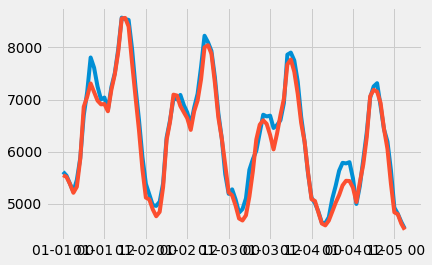

In [ ]:
plt.plot(train_results['Train Predictions'][0:100])
plt.plot(train_results['Actuals'][0:100])

In [ ]:
test_predictions = model.predict(X_test)
test_predictions.shape

268/268 [==============================] - 1s 2ms/step


(8568, 1, 1)

In [ ]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test.flatten()},index=cv['ds'])
test_results

Test Predictions  Actuals
ds                                            
2015-12-25 00:00:00       4592.581543   4505.0
2015-12-25 01:00:00       4506.627441   4425.0
2015-12-25 02:00:00       4316.366699   4216.0
2015-12-25 03:00:00       4166.500977   4093.0
2015-12-25 04:00:00       4119.980957   4037.0
...                               ...      ...
2016-12-15 19:00:00       8561.116211   8563.0
2016-12-15 20:00:00       8030.710938   7705.0
2016-12-15 21:00:00       7385.034668   6759.0
2016-12-15 22:00:00       6707.298340   6320.0
2016-12-15 23:00:00       5777.325684   6320.0

[8568 rows x 2 columns]

In [ ]:
mae_Cnn_lstm = mean_absolute_error(test_results["Test Predictions"], test_results["Actuals"])

In [ ]:
mae_Cnn_lstm

132.82722893437975

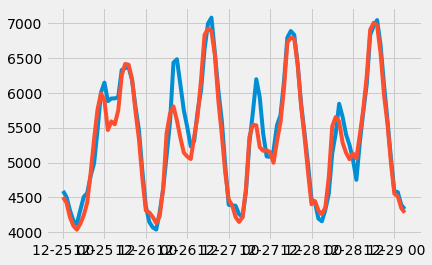

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

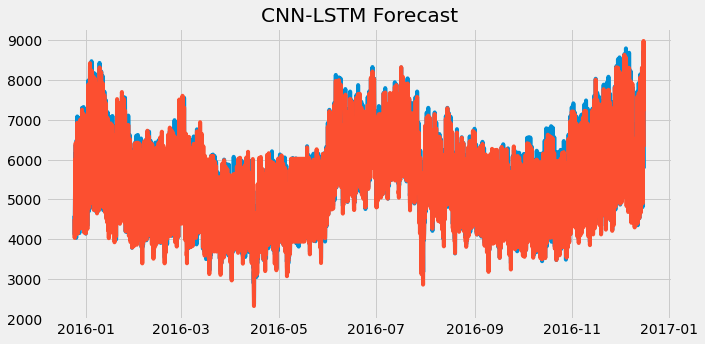

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = plt.plot(test_results)
ax.set_title('CNN-LSTM Forecast')
plt.show()

In [ ]:
fig = tf.keras.utils.plot_model(model)

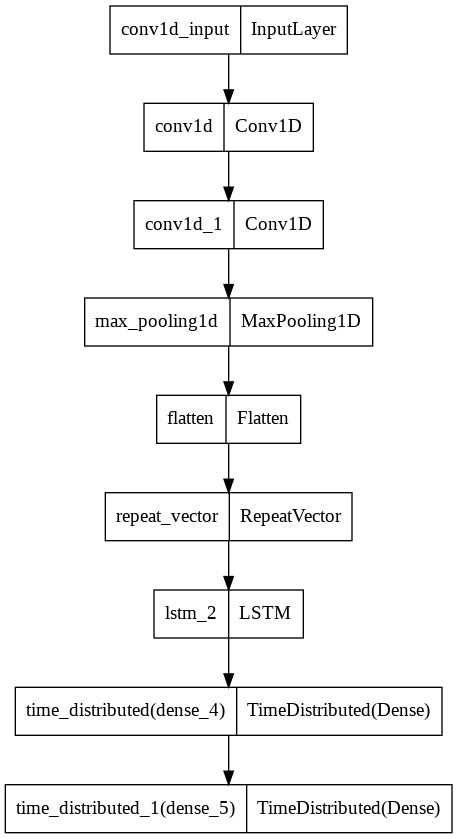

In [ ]:
fig

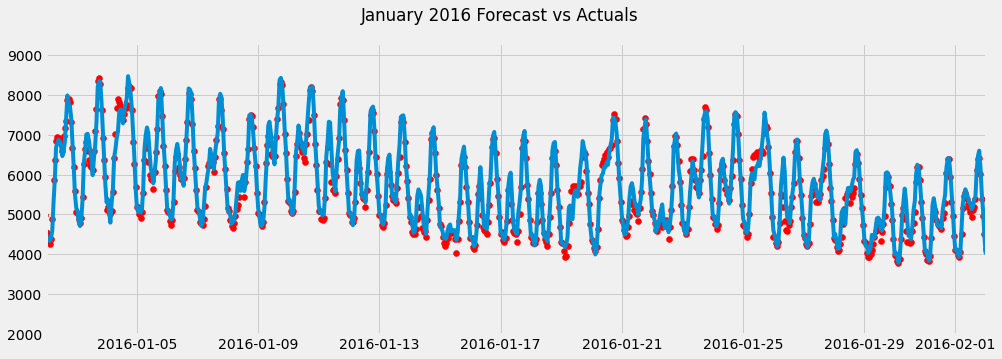

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[192],upper=test_results.index[936])
plot = plt.suptitle('January 2016 Forecast vs Actuals')

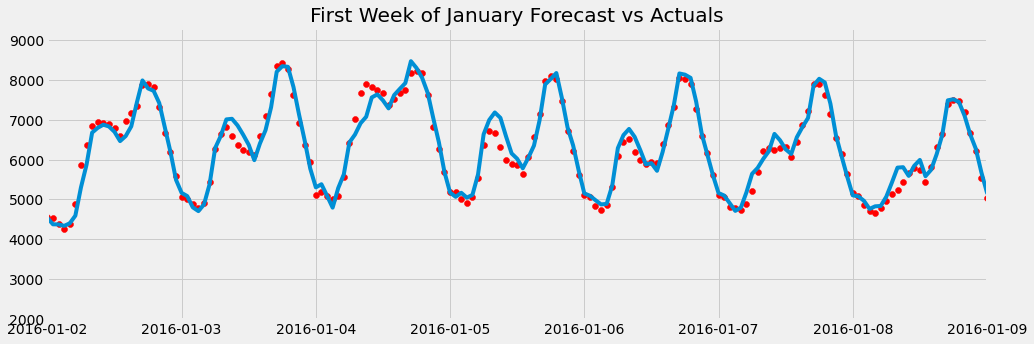

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[192], upper=test_results.index[360])
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

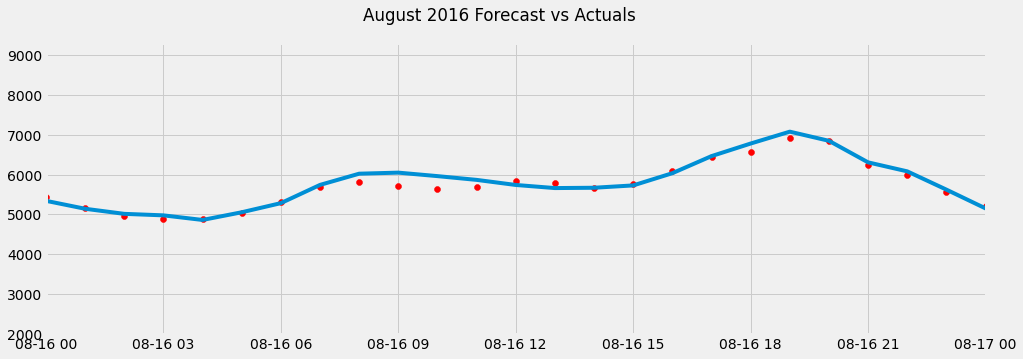

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[5640],
              upper=test_results.index[5664])
plot = plt.suptitle('August 2016 Forecast vs Actuals')

In [ ]:
X_train.shape

(26088, 24, 16)

In [ ]:
n_steps = 24 
n_length = 1
n_features = X_train.shape[2]

In [ ]:
# reshape into subsequences [samples, timesteps, rows, cols, channels]
X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))

In [ ]:
y_train.shape

(26088, 1, 1)

In [ ]:
# reshape output into [samples, timesteps, features]
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))

In [ ]:
y_train.shape

(26088, 1, 1)

In [ ]:
verbose, epochs, batch_size = 2, 30, 16

In [ ]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu',padding='same',
input_shape=(n_steps, 1, n_length, n_features)))
model.add(Flatten())
model.add(RepeatVector(n_outputs))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 1, 64)          61696     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 64)            0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 1, 200)            212000    
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 100)           20100     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 1)            

In [ ]:
# save model
model.save('Conv_Lstm_Model.h5')
print('Model Saved!')

Model Saved!


In [ ]:
# fit network
%%time
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/30
1631/1631 - 223s - loss: 719.4620 - 223s/epoch - 137ms/step
Epoch 2/30
1631/1631 - 221s - loss: 526.8196 - 221s/epoch - 136ms/step
Epoch 3/30
1631/1631 - 228s - loss: 445.7387 - 228s/epoch - 140ms/step
Epoch 4/30
1631/1631 - 220s - loss: 382.6723 - 220s/epoch - 135ms/step
Epoch 5/30
1631/1631 - 219s - loss: 324.5836 - 219s/epoch - 134ms/step
Epoch 6/30
1631/1631 - 220s - loss: 362.5622 - 220s/epoch - 135ms/step
Epoch 7/30
1631/1631 - 221s - loss: 315.3931 - 221s/epoch - 136ms/step
Epoch 8/30
1631/1631 - 220s - loss: 262.7801 - 220s/epoch - 135ms/step
Epoch 9/30
1631/1631 - 218s - loss: 237.0399 - 218s/epoch - 134ms/step
Epoch 10/30
1631/1631 - 214s - loss: 205.6218 - 214s/epoch - 131ms/step
Epoch 11/30
1631/1631 - 215s - loss: 219.2799 - 215s/epoch - 132ms/step
Epoch 12/30
1631/1631 - 215s - loss: 176.3547 - 215s/epoch - 132ms/step
Epoch 13/30
1631/1631 - 211s - loss: 148.3346 - 211s/epoch - 129ms/step
Epoch 14/30
1631/1631 - 206s - loss: 143.6391 - 206s/epoch - 126ms/step
E

In [ ]:
X_train.shape

(26088, 24, 1, 1, 16)

In [ ]:
train_predictions = model.predict(X_train)
len(train_predictions)

816/816 [==============================] - 19s 23ms/step


26088

In [ ]:
train_results = pd.DataFrame(data={'Train Predictions':train_predictions.flatten(), 'Actuals':y_train.flatten()},index = train.index)
train_results

Train Predictions  Actuals
Datetime                                       
2013-01-01 00:00:00        5744.177734   5548.0
2013-01-01 01:00:00        5659.453125   5515.0
2013-01-01 02:00:00        5351.362793   5380.0
2013-01-01 03:00:00        5302.799316   5210.0
2013-01-01 04:00:00        5425.607910   5325.0
...                                ...      ...
2015-12-23 19:00:00        6994.552734   6603.0
2015-12-23 20:00:00        6527.632812   6239.0
2015-12-23 21:00:00        5896.894531   5751.0
2015-12-23 22:00:00        5495.857910   5402.0
2015-12-23 23:00:00        5041.794434   4920.0

[26088 rows x 2 columns]

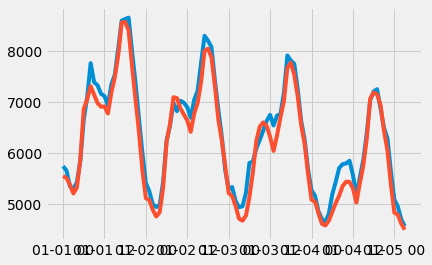

In [ ]:
plt.plot(train_results['Train Predictions'][0:100])
plt.plot(train_results['Actuals'][0:100])

In [ ]:
X_test.shape

(8568, 24, 16)

In [ ]:
X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))

In [ ]:
test_predictions = model.predict(X_test)
test_predictions.shape

268/268 [==============================] - 6s 22ms/step


(8568, 1, 1)

In [ ]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test.flatten()},index=cv['ds'])
test_results

Test Predictions  Actuals
ds                                            
2015-12-25 00:00:00       4659.630859   4505.0
2015-12-25 01:00:00       4572.273438   4425.0
2015-12-25 02:00:00       4357.839355   4216.0
2015-12-25 03:00:00       4223.072754   4093.0
2015-12-25 04:00:00       4205.641113   4037.0
...                               ...      ...
2016-12-15 19:00:00       8777.958984   8563.0
2016-12-15 20:00:00       8093.642090   7705.0
2016-12-15 21:00:00       7449.690918   6759.0
2016-12-15 22:00:00       6781.050293   6320.0
2016-12-15 23:00:00       5829.304199   6320.0

[8568 rows x 2 columns]

In [ ]:
mae_Conv_lstm = mean_absolute_error(test_results["Test Predictions"], test_results["Actuals"])

In [ ]:
mae_Conv_lstm

169.75560281078577

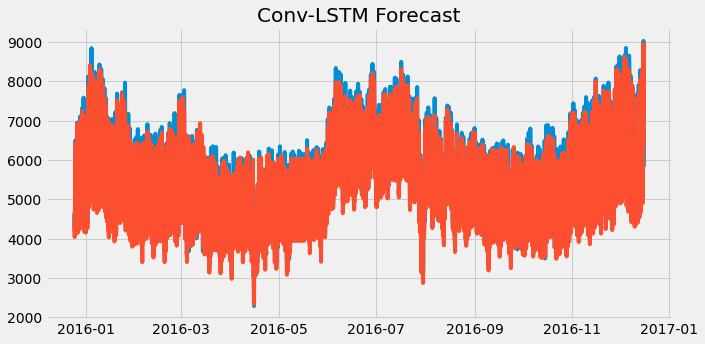

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = plt.plot(test_results)
ax.set_title('Conv-LSTM Forecast')
plt.show()

In [ ]:
fig = tf.keras.utils.plot_model(model)

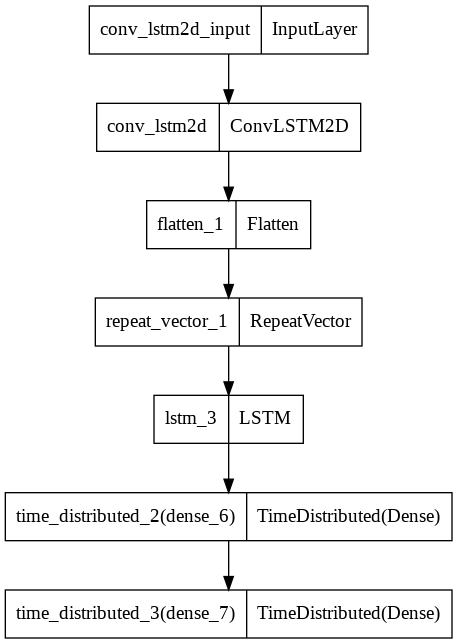

In [ ]:
fig

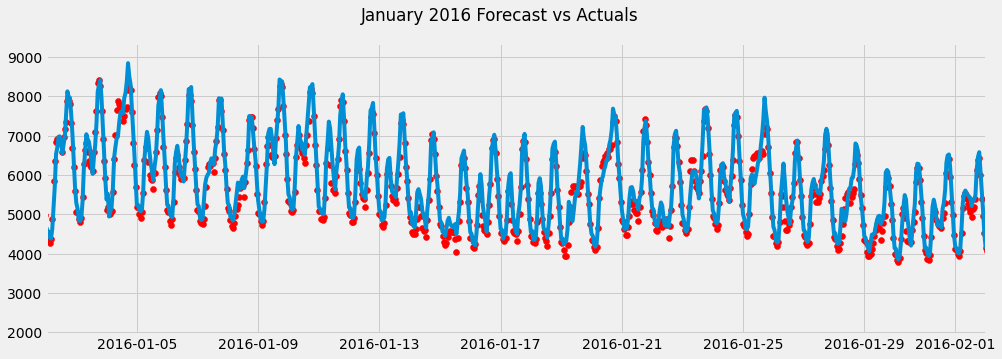

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[192],upper=test_results.index[936])
plot = plt.suptitle('January 2016 Forecast vs Actuals')


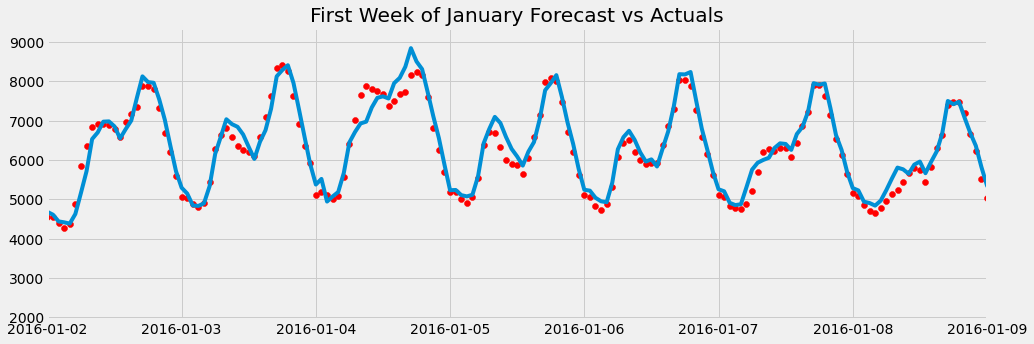

In [ ]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[192], upper=test_results.index[360])
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

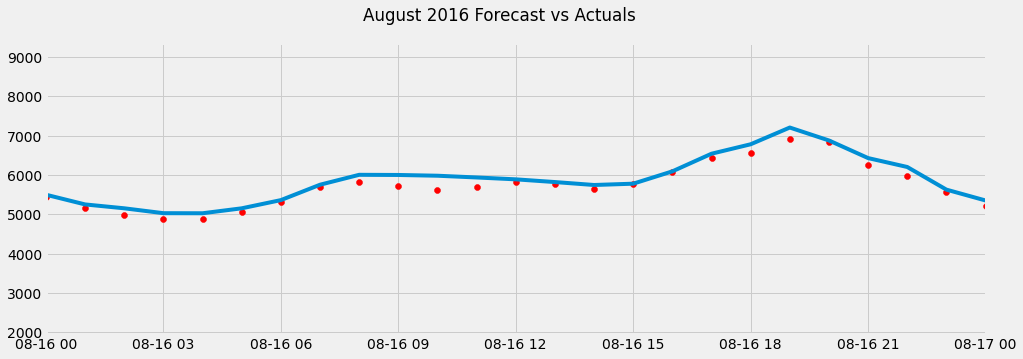

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index, test_results['Actuals'], color='r')
fig = plt.plot(test_results['Test Predictions'])
ax.set_xbound(lower=test_results.index[5640],
              upper=test_results.index[5664])
plot = plt.suptitle('August 2016 Forecast vs Actuals')

In [ ]:
maes = [mae_lstm,mae_Cnn_lstm,mae_Conv_lstm]

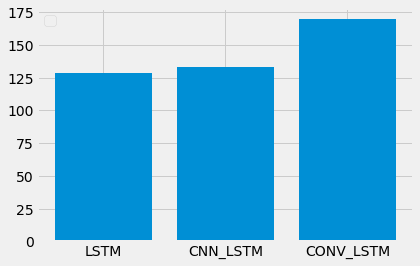

In [ ]:
height = maes
bars = ['LSTM','CNN_LSTM','CONV_LSTM']
plt.bar(bars, height)
plt.legend()